In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
pd.set_option('display.max_columns',None)

In [78]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [79]:
train.shape

(1460, 81)

In [80]:
test.shape

(1459, 80)

In [81]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [82]:
miss_col=[col for col in train.columns if train[col].isnull().sum()>=1]

# EDA

In [83]:
for  i in miss_col:
    print(i,',',np.round(train[i].isnull().mean()*100,3),'% of missing values')

LotFrontage , 17.74 % of missing values
Alley , 93.767 % of missing values
MasVnrType , 0.548 % of missing values
MasVnrArea , 0.548 % of missing values
BsmtQual , 2.534 % of missing values
BsmtCond , 2.534 % of missing values
BsmtExposure , 2.603 % of missing values
BsmtFinType1 , 2.534 % of missing values
BsmtFinType2 , 2.603 % of missing values
Electrical , 0.068 % of missing values
FireplaceQu , 47.26 % of missing values
GarageType , 5.548 % of missing values
GarageYrBlt , 5.548 % of missing values
GarageFinish , 5.548 % of missing values
GarageQual , 5.548 % of missing values
GarageCond , 5.548 % of missing values
PoolQC , 99.521 % of missing values
Fence , 80.753 % of missing values
MiscFeature , 96.301 % of missing values


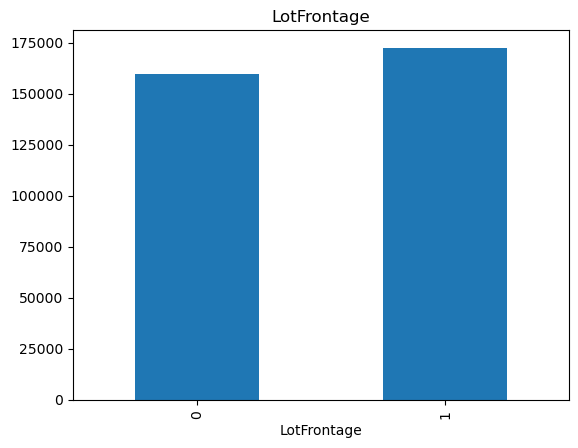

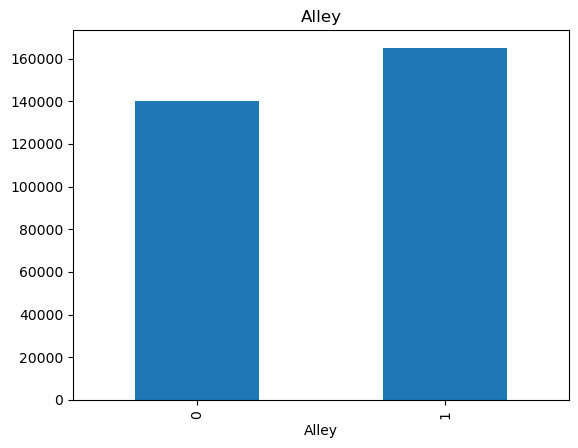

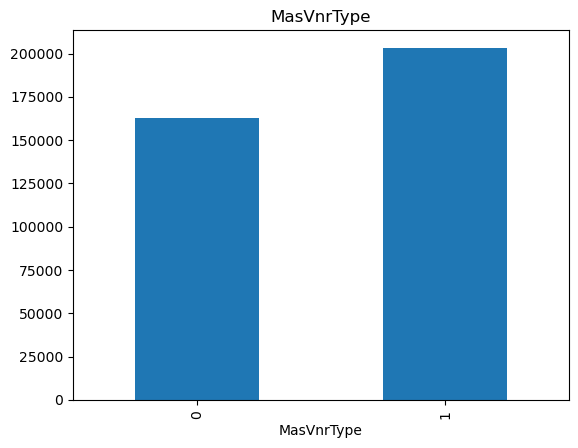

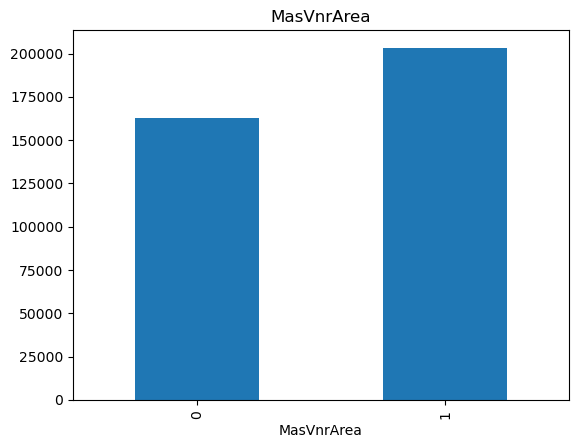

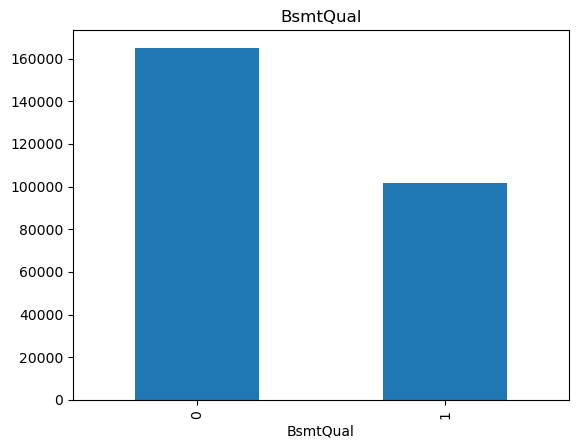

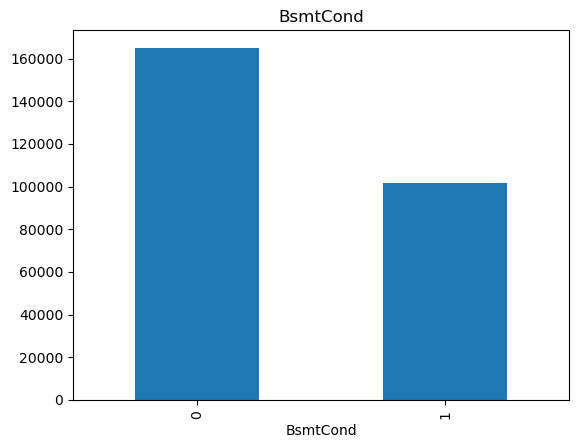

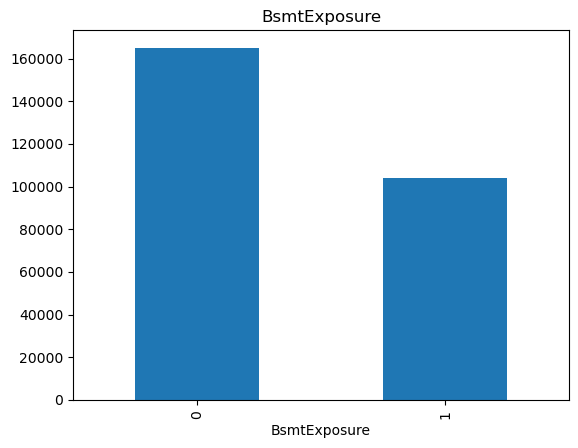

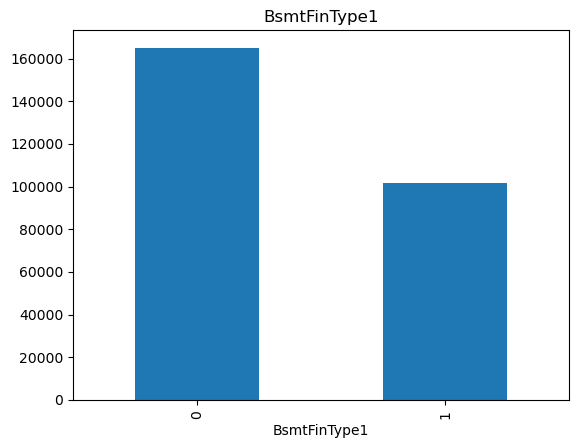

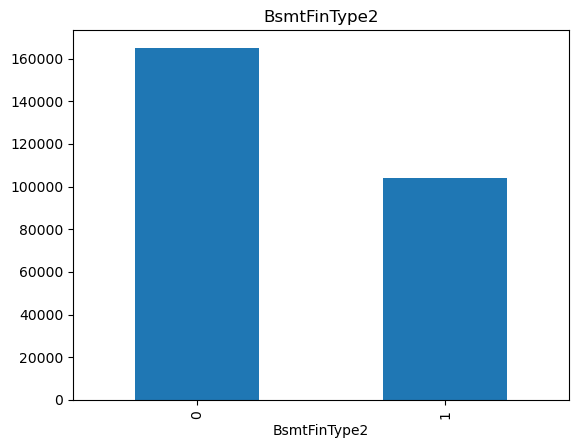

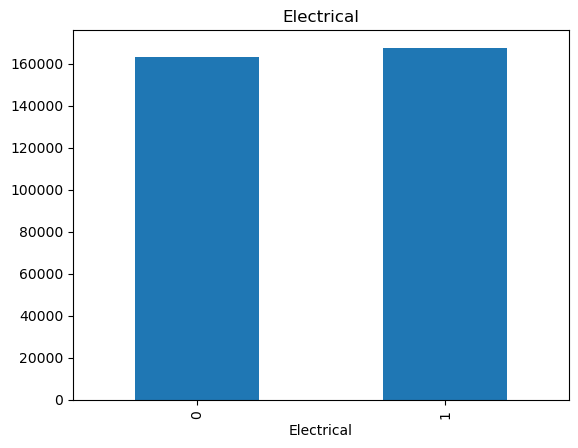

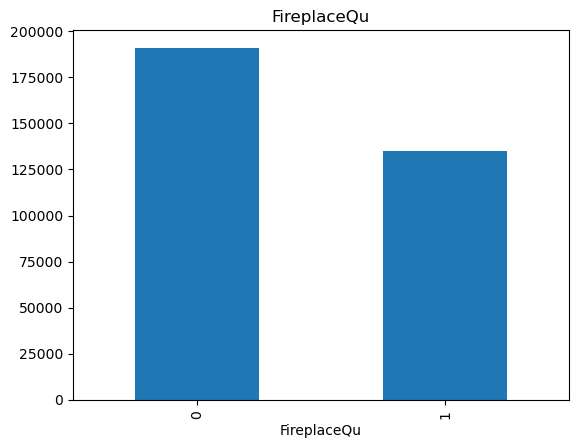

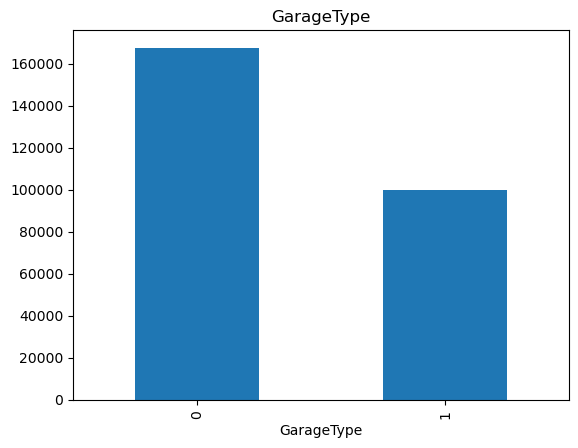

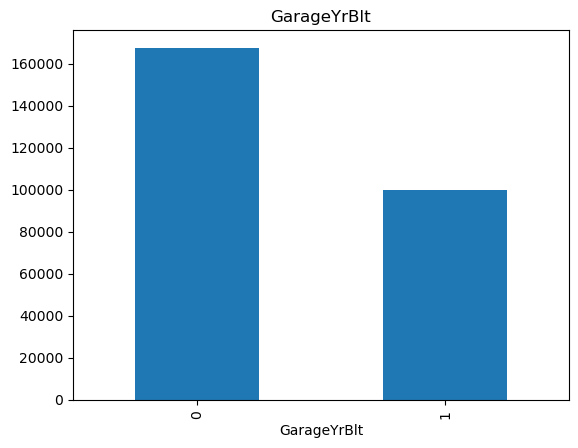

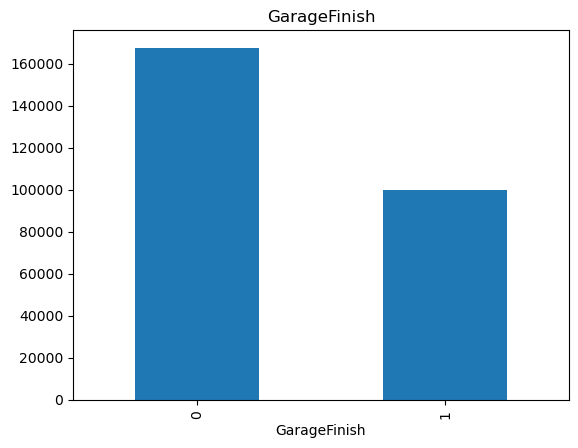

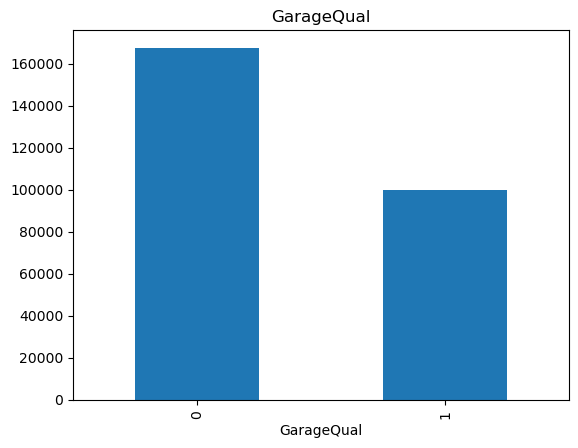

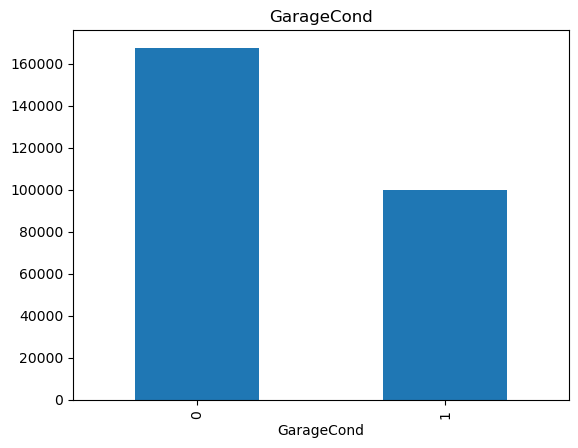

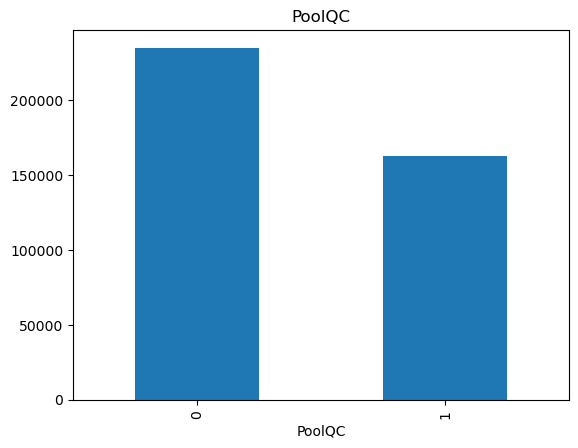

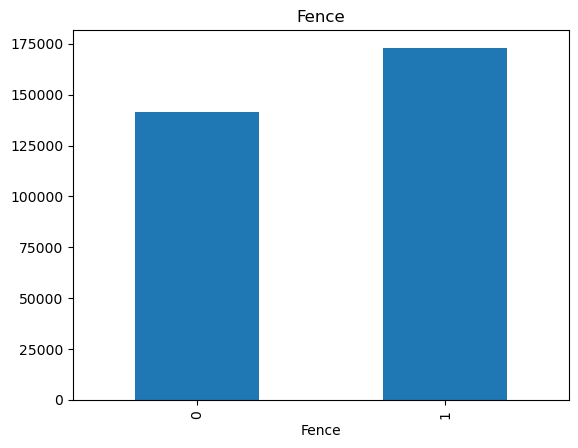

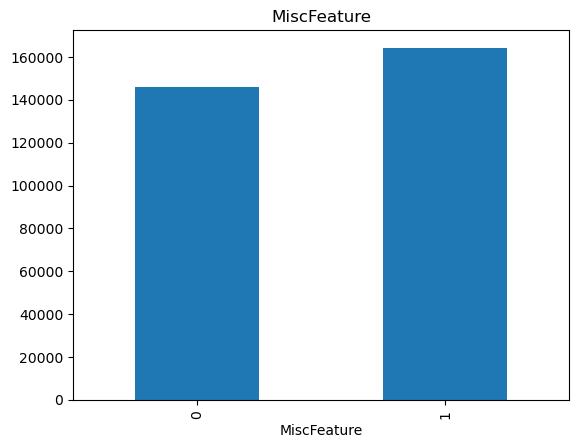

In [84]:
for j in miss_col:
    data=train.copy()
    data[j]=np.where(data[j].isnull(),1,0)
    data.groupby(j)['SalePrice'].median().plot.bar()
    plt.title(j)
    plt.show()

In [85]:
data1=train.copy()
data1[miss_col[0]]=np.where(data1[miss_col[0]].isnull(),1,0)
data1.groupby(miss_col[0])['SalePrice'].median()

LotFrontage
0    159500.0
1    172400.0
Name: SalePrice, dtype: float64

In [86]:
# finding numerical columns
num_cols=[cols for cols in data.columns if data[cols].dtypes!='object']
print(len(num_cols))
data[num_cols].head()

39


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscFeature  MiscVal  \
0              0          0            0         0            1        0   
1              0          0            0         0            1        0   
2              0          0            0         0            1        0   
3            272          0            0         0            1        0   
4              0          0            0         0            1        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [88]:
#finding year features
date_cols=[i for i in data.columns if 'Yr' in i or 'Year' in i]
date_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [89]:
for j in date_cols:
    print(j,data[j].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [90]:
for j in date_cols:
    print(j,data[j].nunique())

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 97
YrSold 5


<Axes: xlabel='YrSold'>

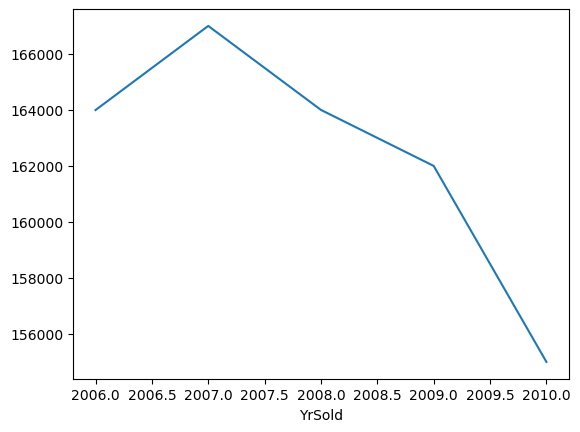

In [91]:
data.groupby('YrSold')['SalePrice'].median().plot()

<Axes: xlabel='YrSold', ylabel='SalePrice'>

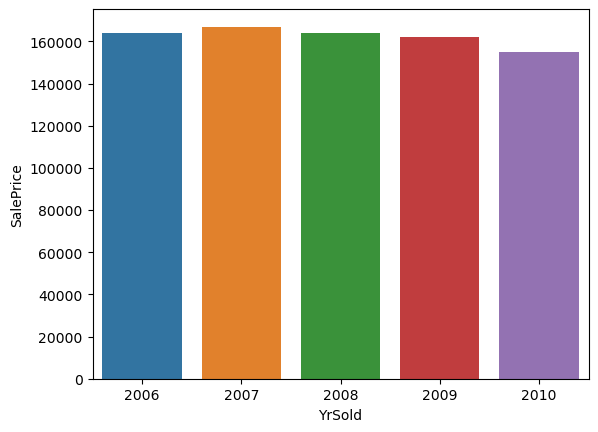

In [92]:
z=data.groupby('YrSold')['SalePrice'].median().reset_index()
sns.barplot(data=z,x='YrSold',y='SalePrice')

<Axes: xlabel='YearBuilt'>

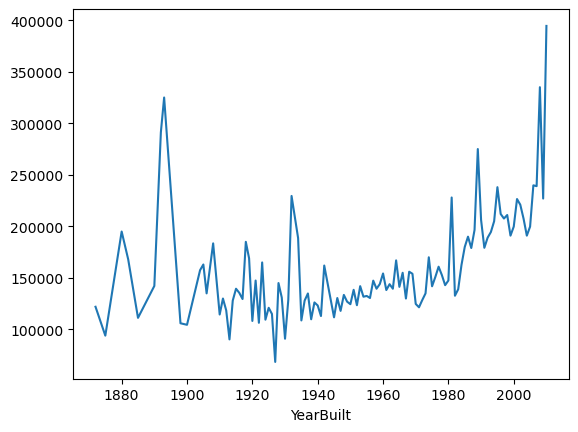

In [93]:
data.groupby('YearBuilt')['SalePrice'].median().plot()

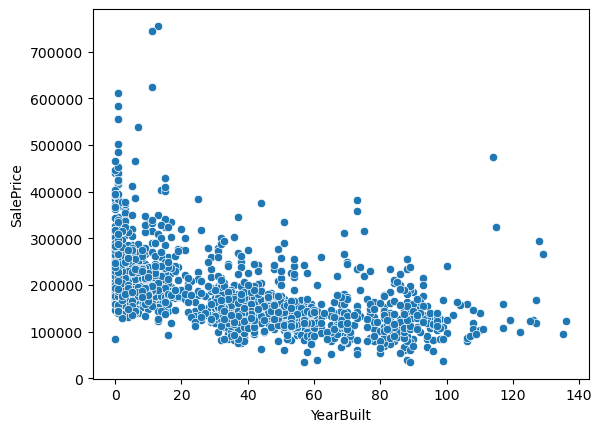

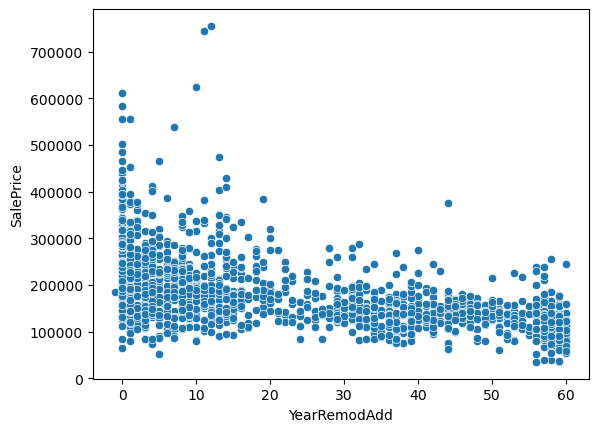

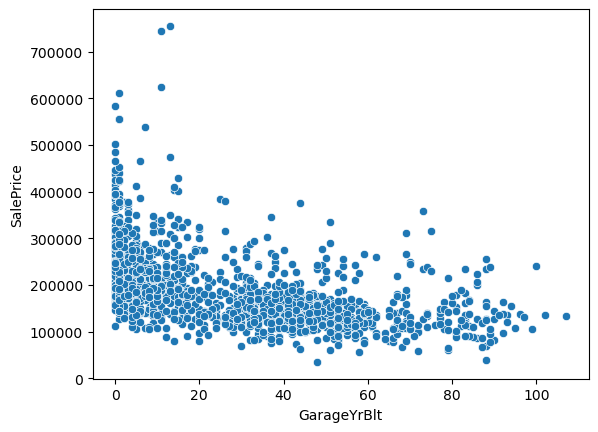

In [94]:
data3=train.copy()
for u in date_cols:
    if u!='YrSold':
        data3[u]=data3['YrSold']-data3[u]
        plt.figure()
        sns.scatterplot(data=data3,x=data3[u],y=data3['SalePrice'])
        plt.xlabel(u)
        

In [95]:
# finding discrete features
disc_cols=[i for i in num_cols if data3[i].nunique()<=25]
len(disc_cols)

19

In [96]:
data[disc_cols].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscFeature  MiscVal  MoSold  \
0           0           2          0         0            1        0       2   
1           1           2          0         0            1        0       5   
2           1           2          0         0            1        0       9   
3           1           3          0         0            1        0       2   
4           1           3          0         0            1        0      12   

   YrSold  
0    2008  
1    2007  
2    2008  
3    2006  
4    2008

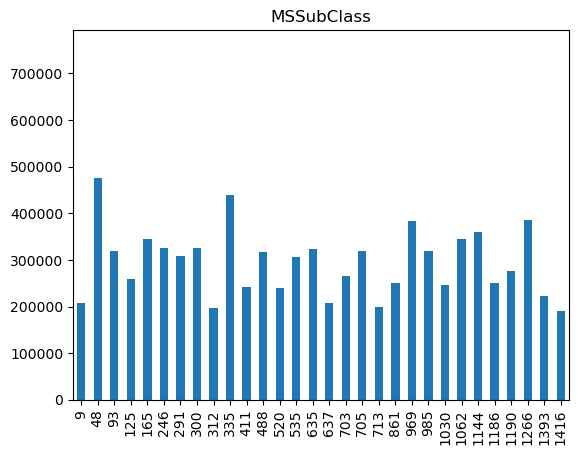

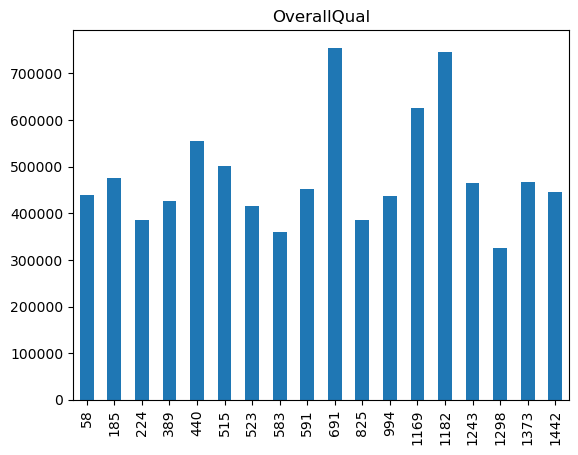

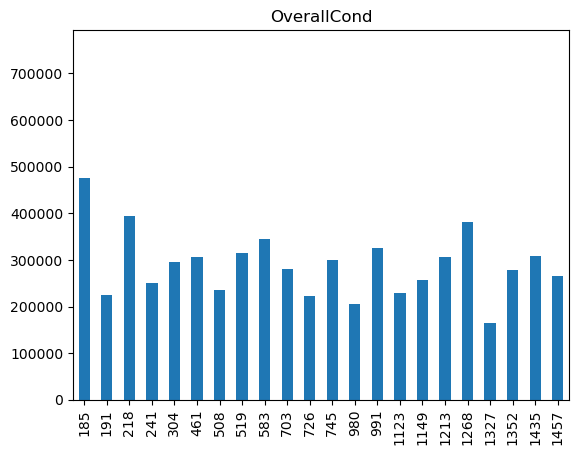

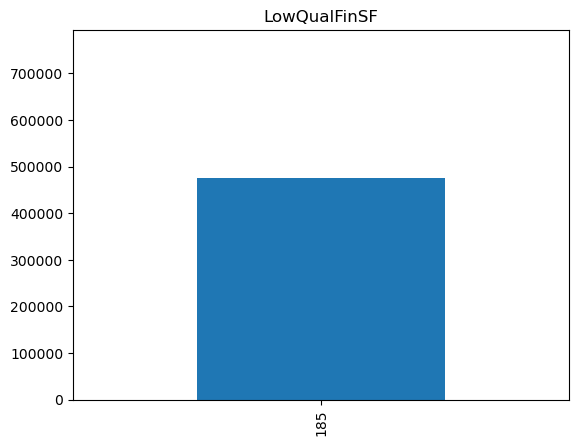

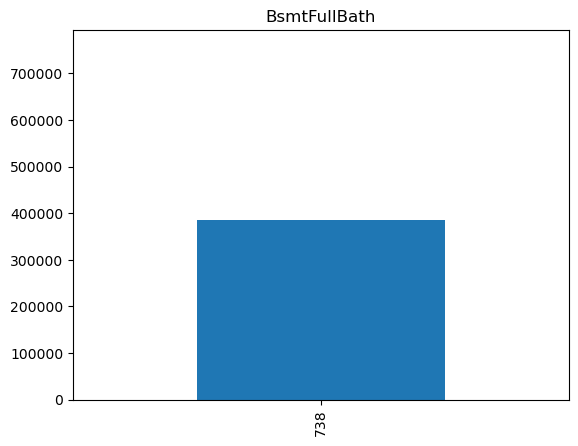

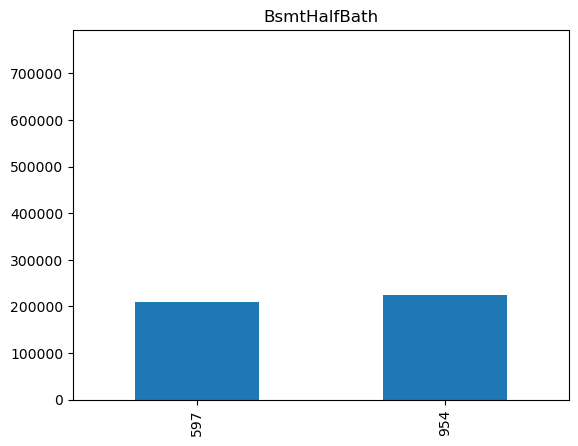

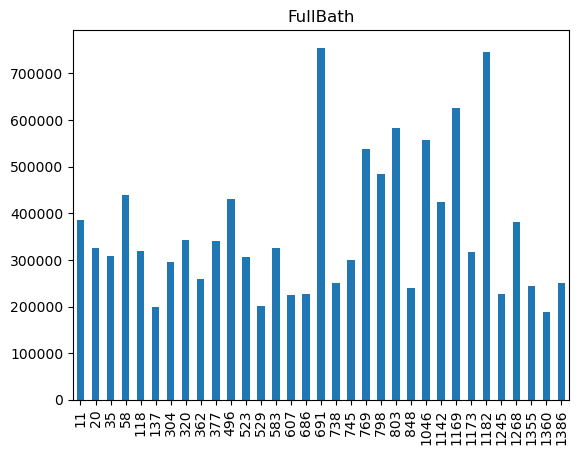

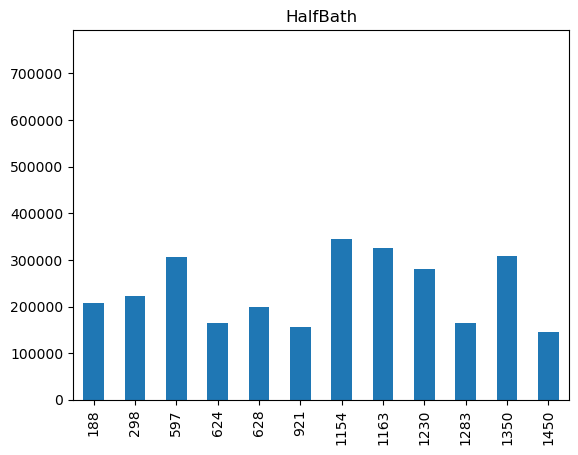

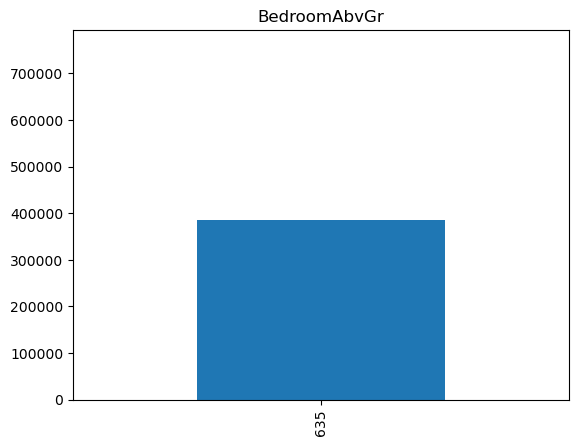

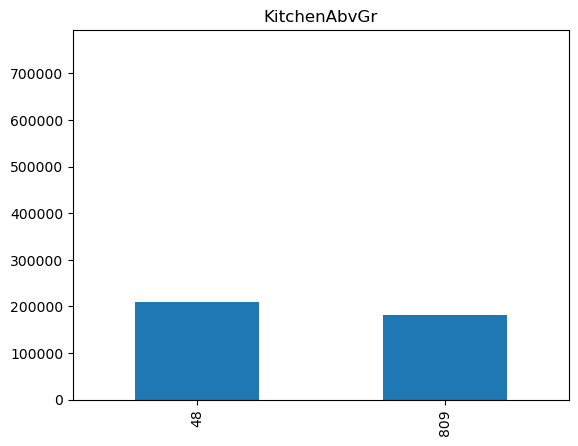

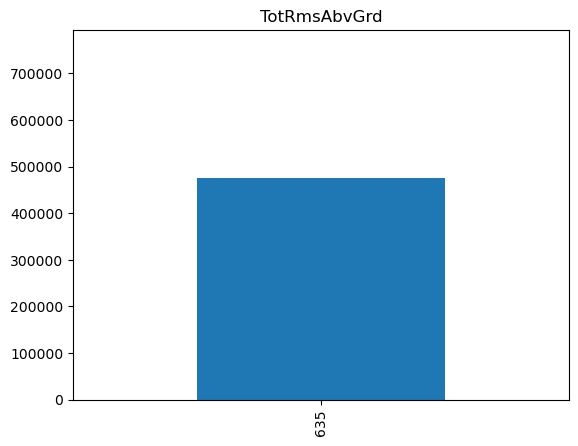

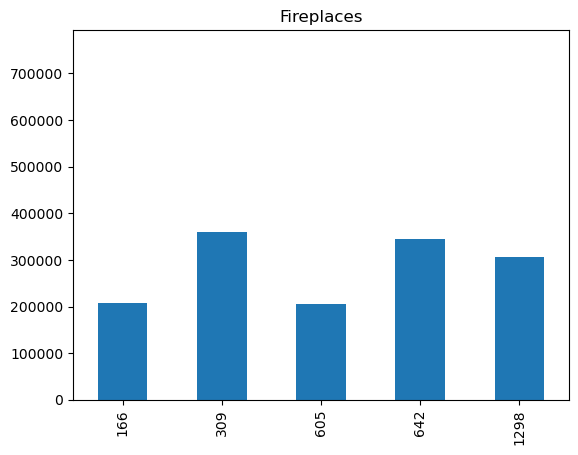

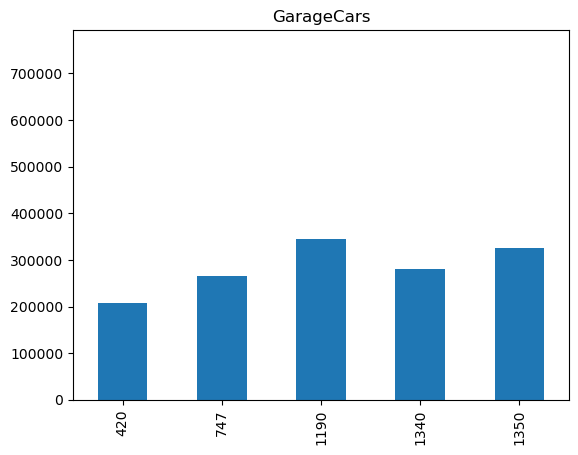

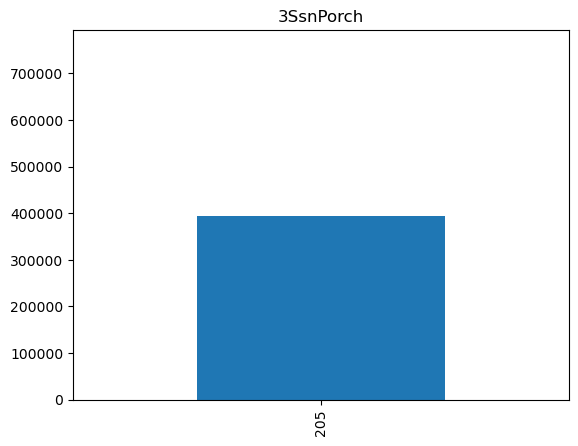

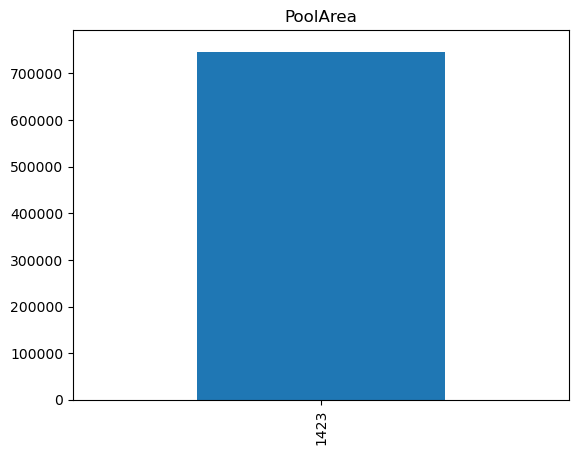

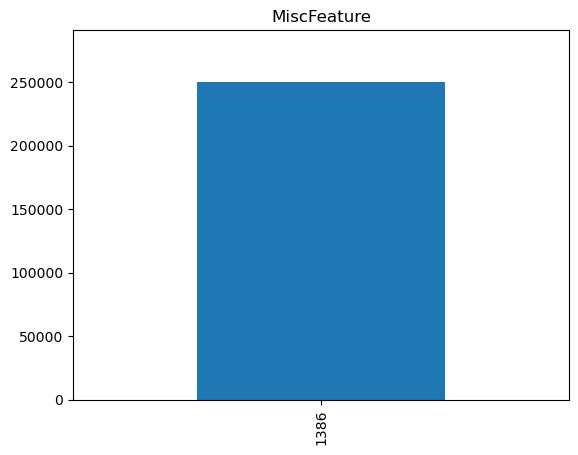

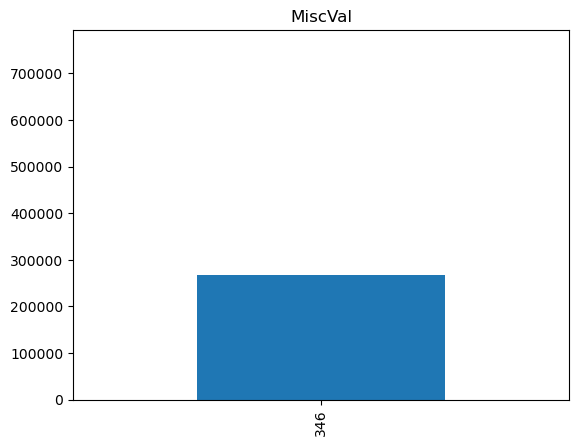

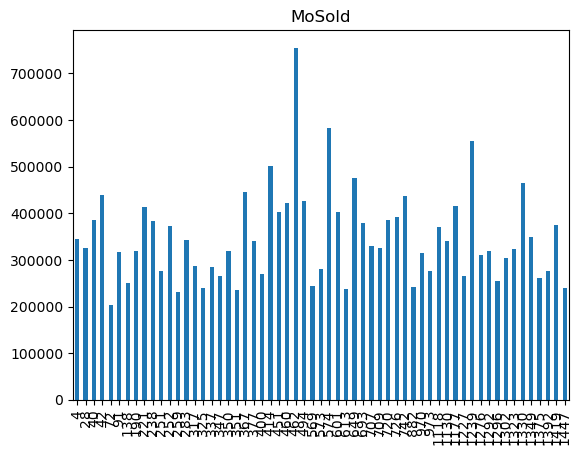

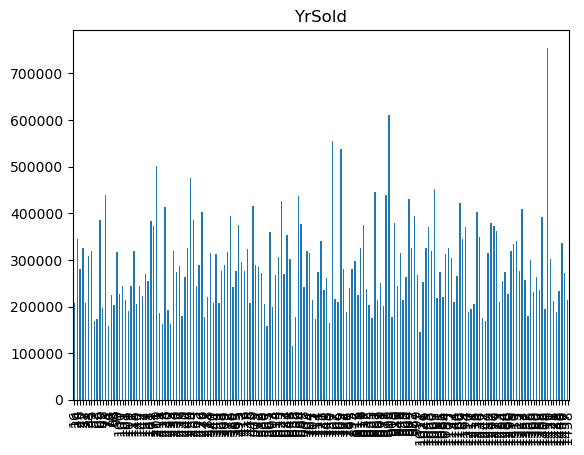

In [97]:
data=train.copy()
for i in disc_cols:
    
    data.groupby(i)['SalePrice'].plot(kind='bar')
    plt.title(i)
    plt.show()
    

In [98]:
cont_cols=[i for i in num_cols if i not in disc_cols+date_cols]
len(cont_cols)

17

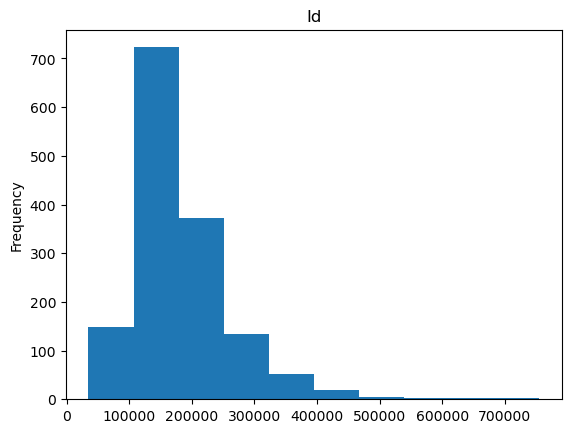

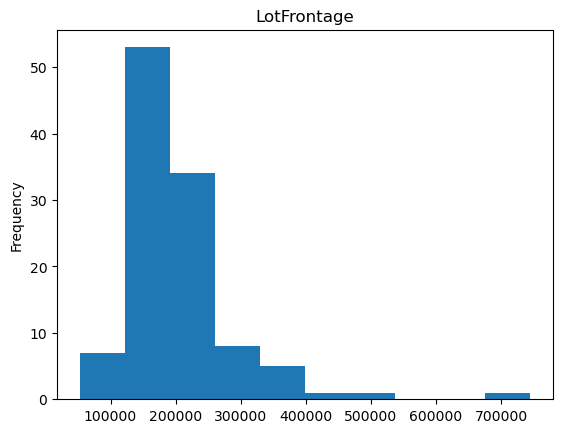

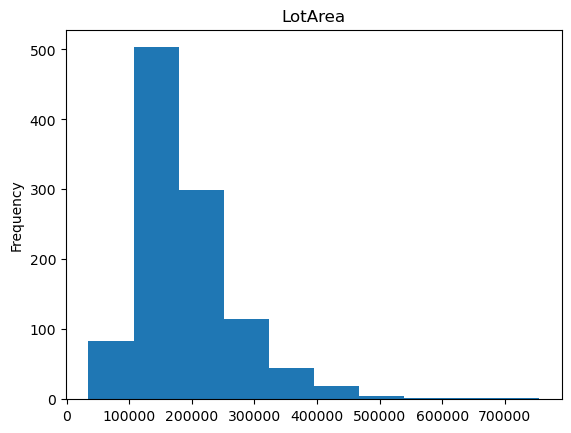

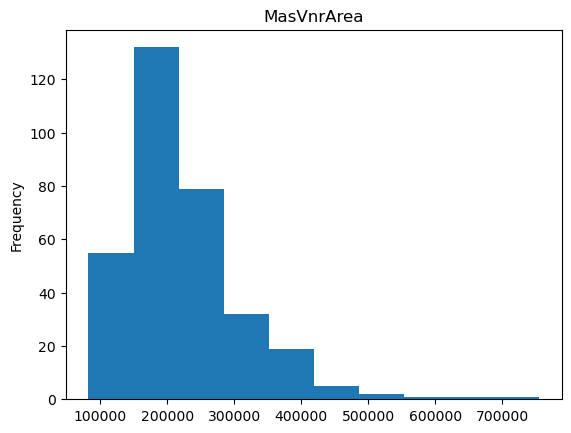

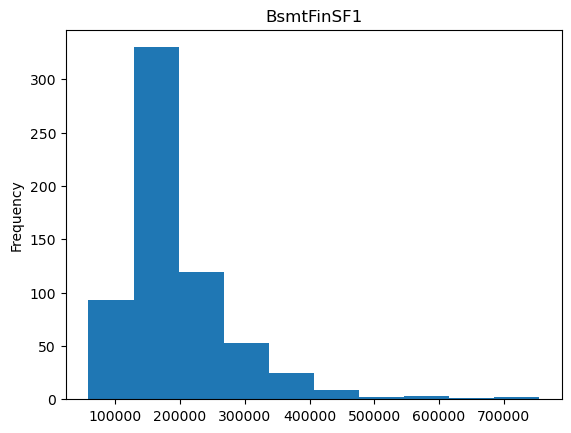

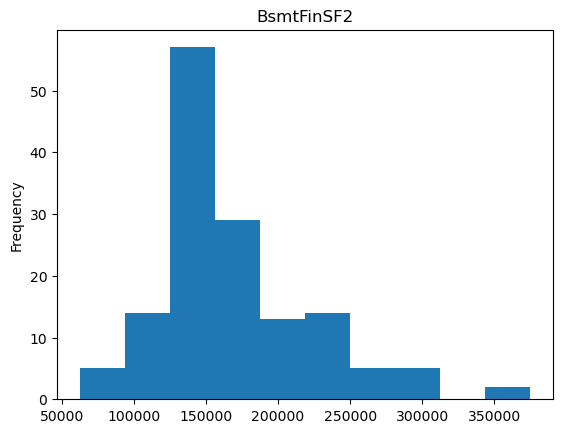

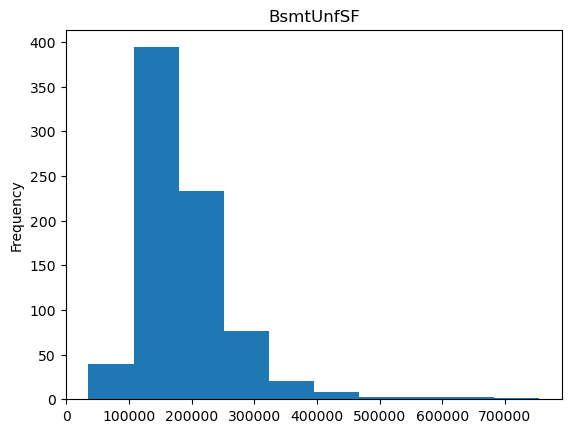

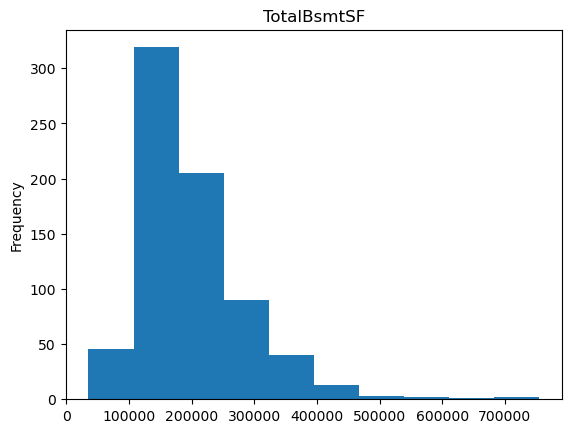

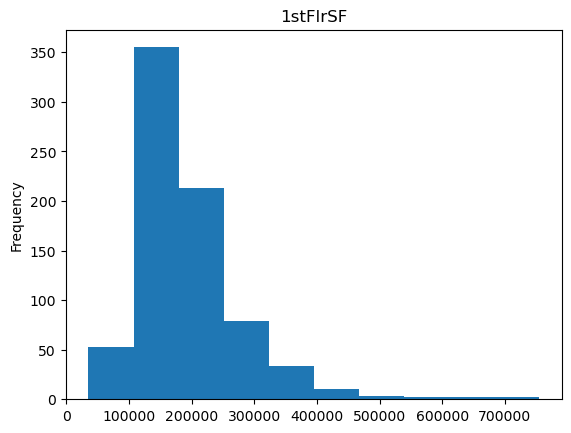

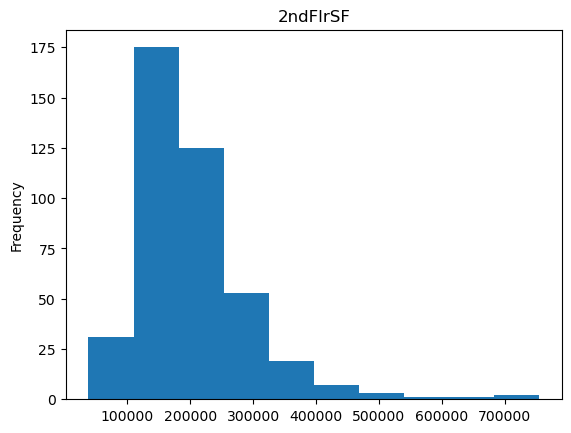

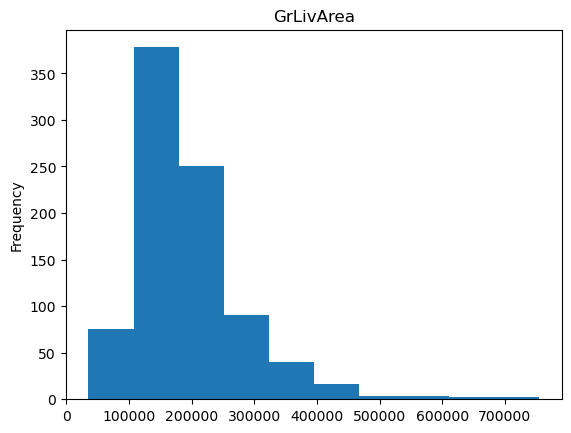

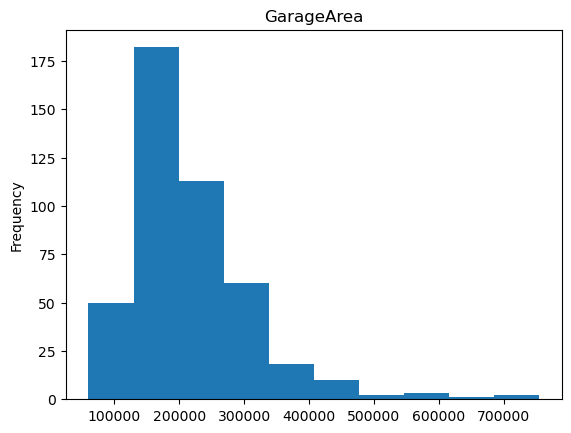

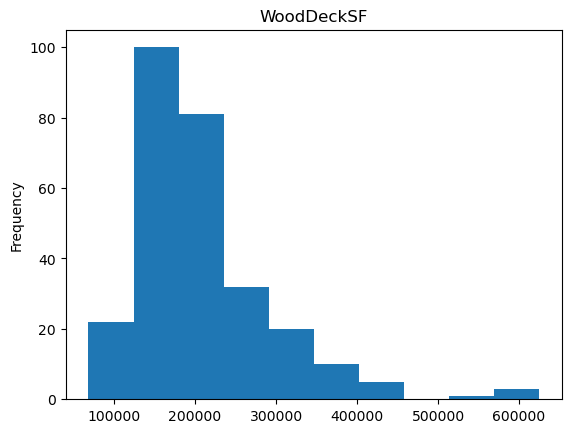

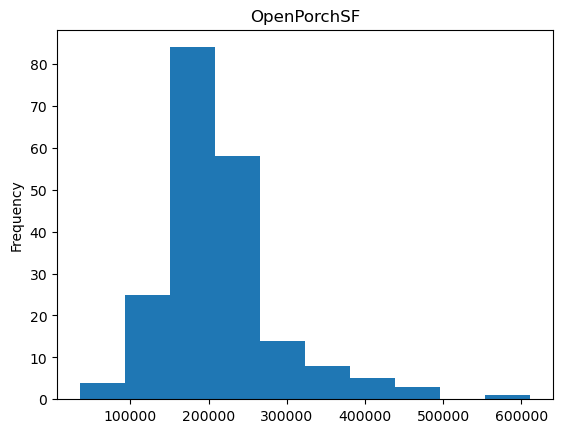

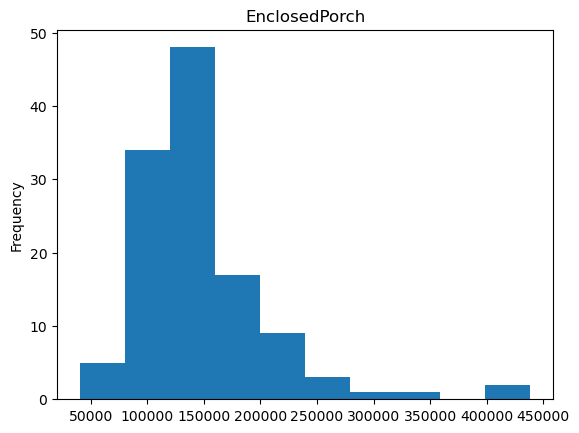

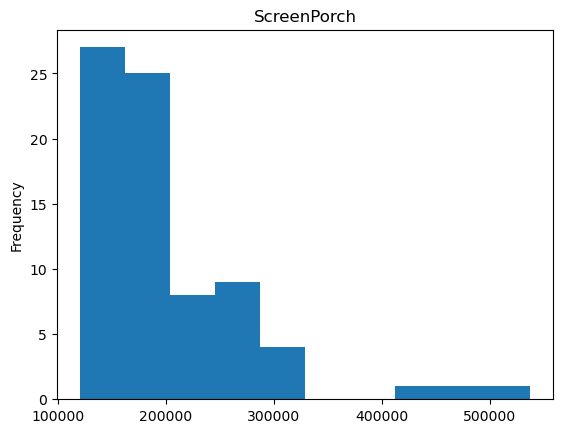

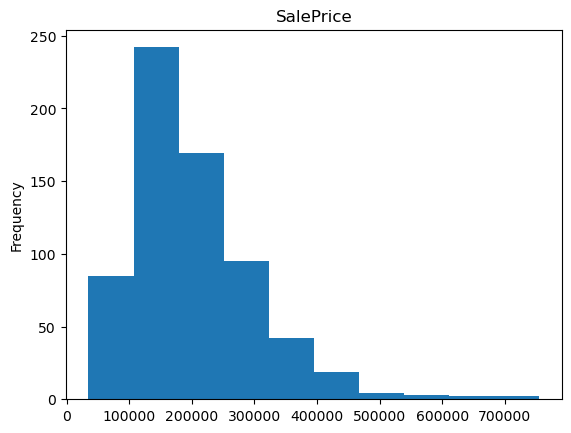

In [99]:
# analyzing continous features
data=train.copy()
for i in cont_cols:
    
    data.groupby(i)['SalePrice'].median().plot(kind='hist')
    plt.title(i)
    plt.show()

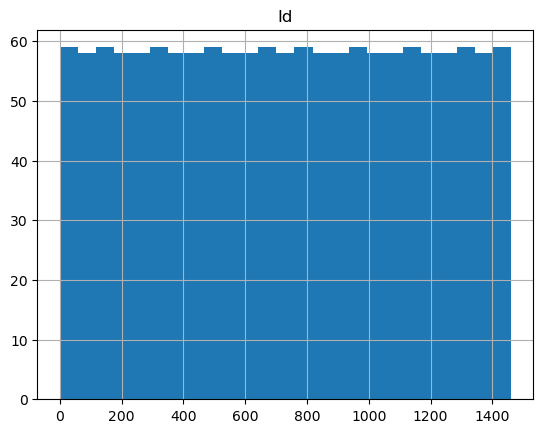

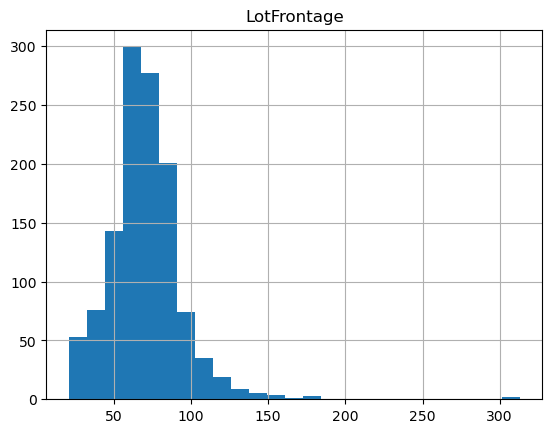

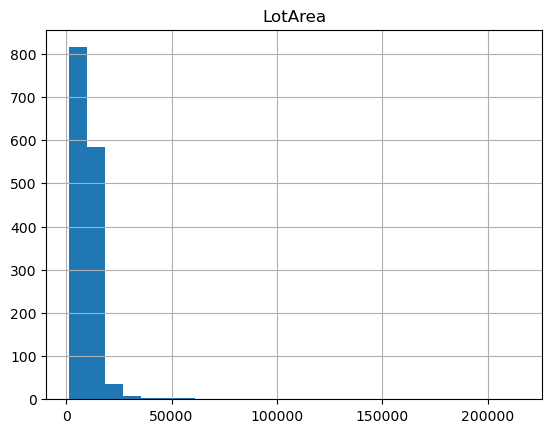

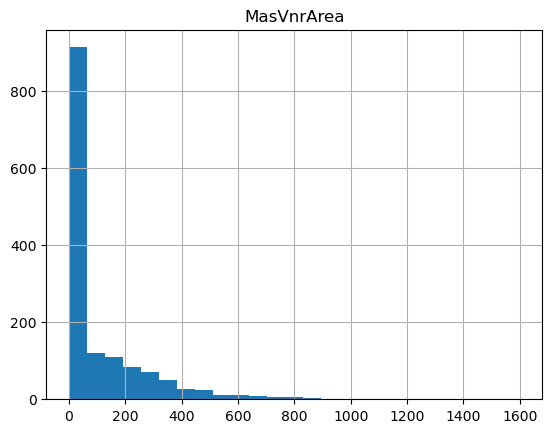

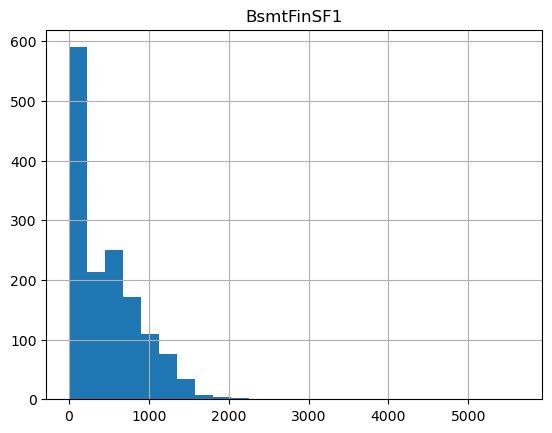

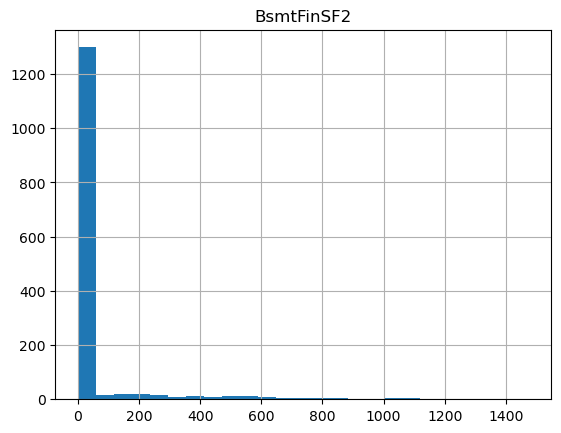

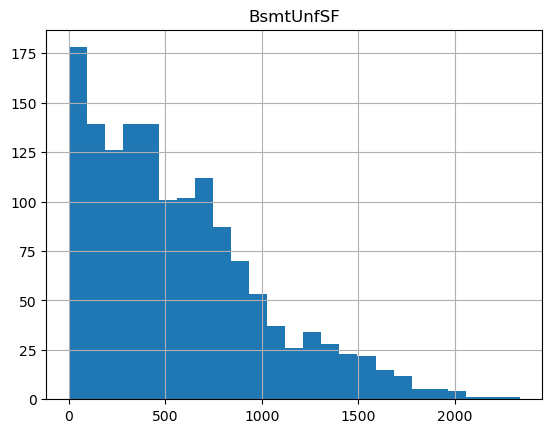

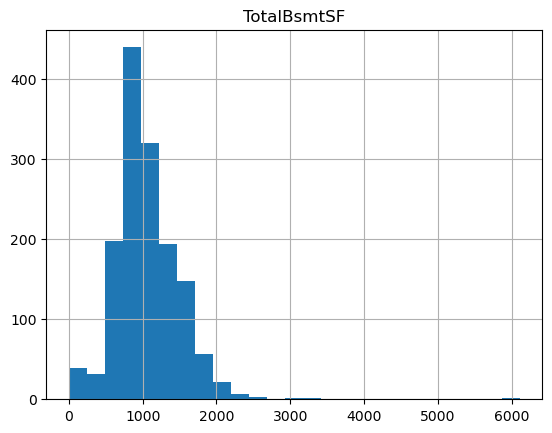

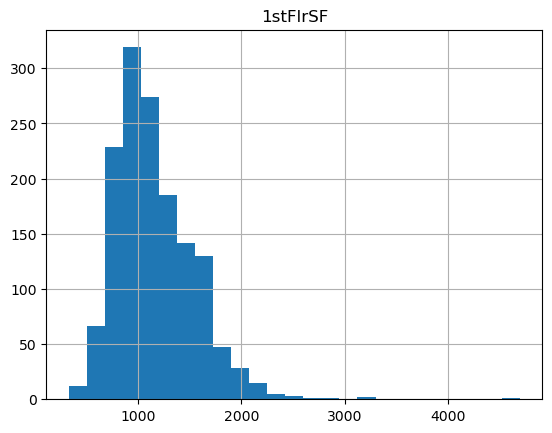

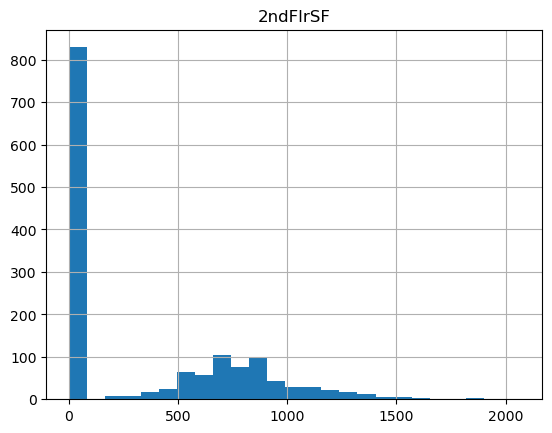

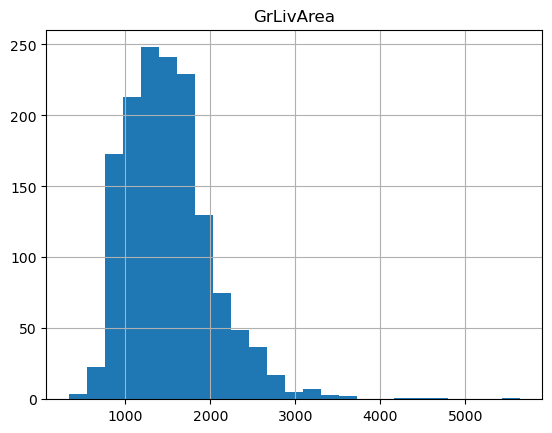

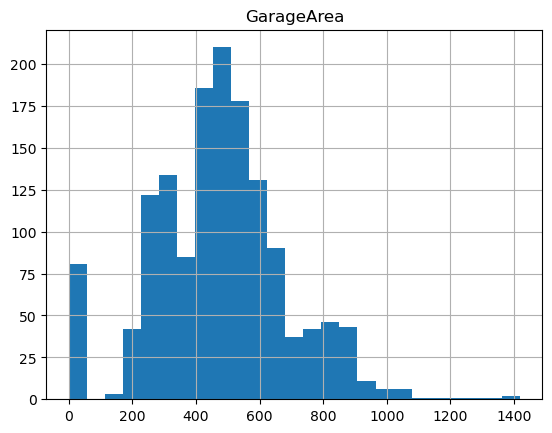

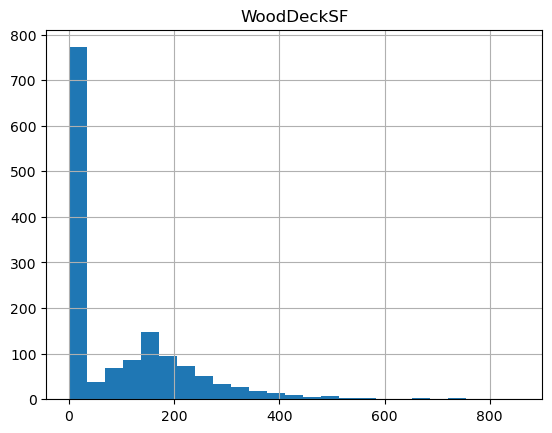

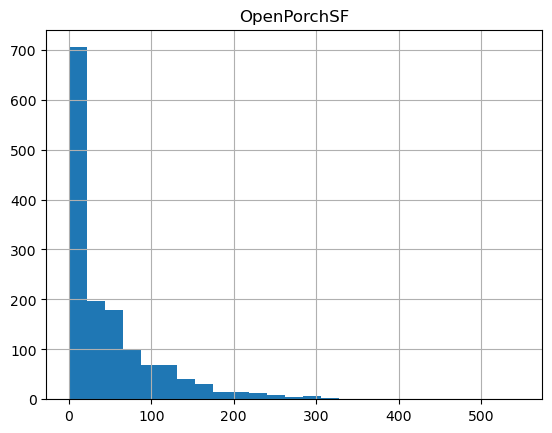

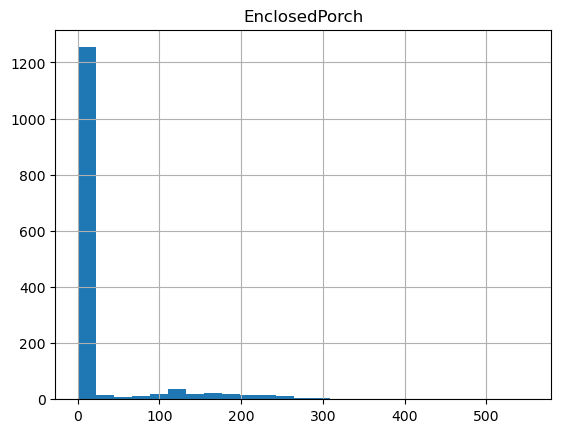

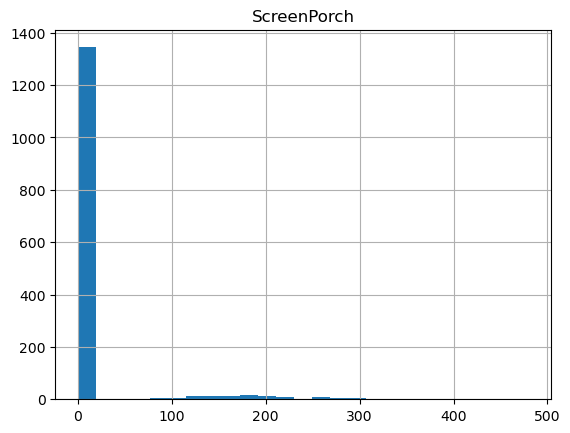

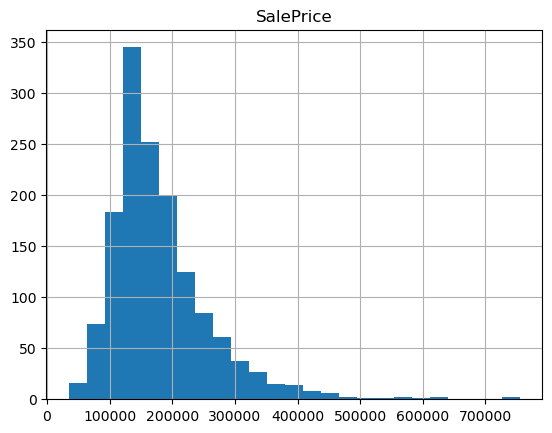

In [100]:
# analyzing continous features
data=train.copy()
for i in cont_cols:
    
    data[i].hist(bins=25)
    plt.title(i)
    plt.show()

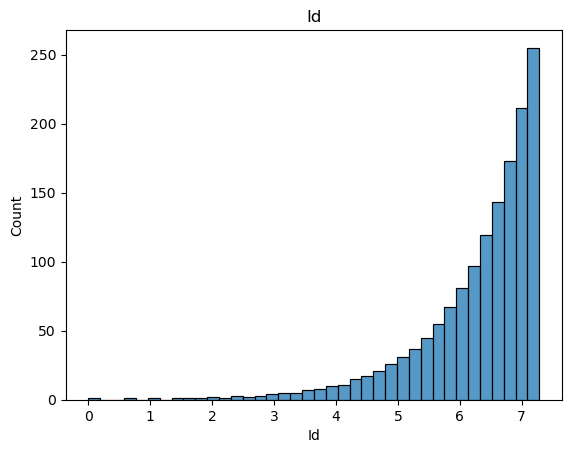

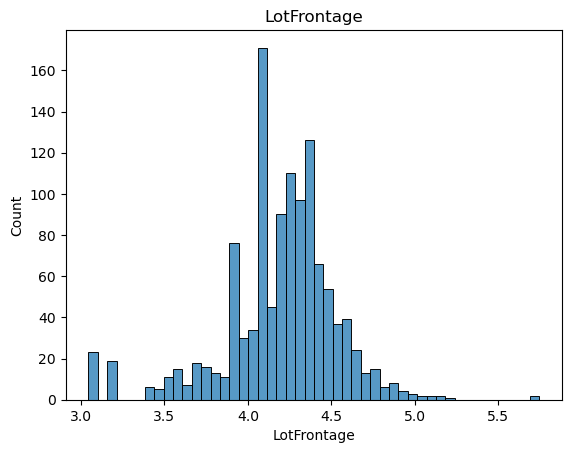

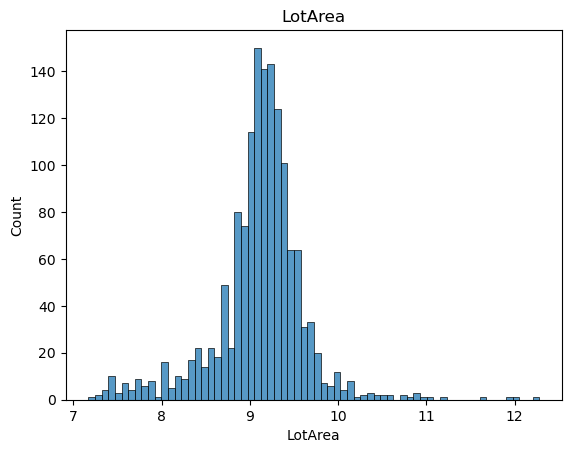

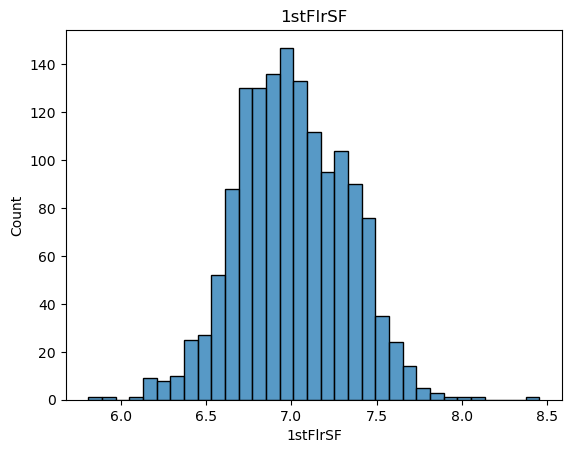

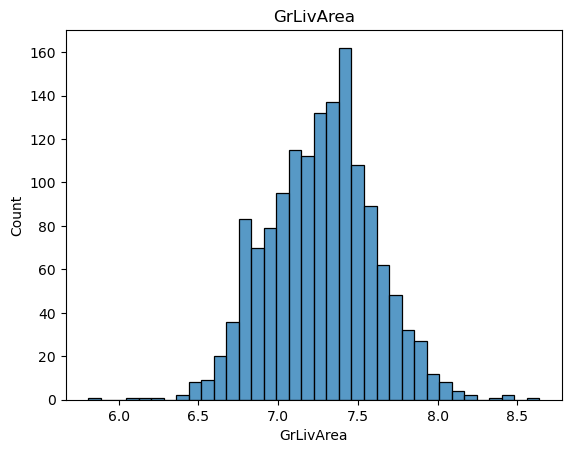

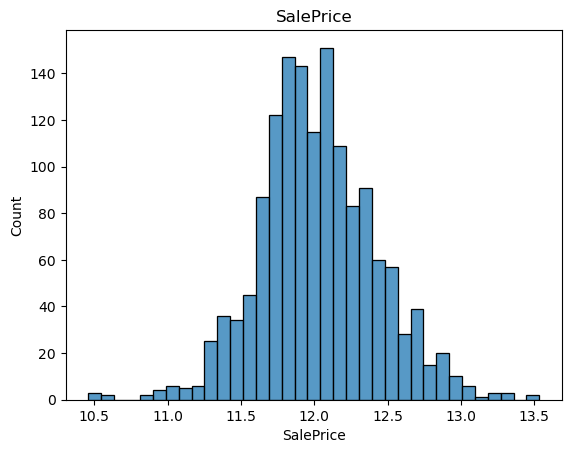

In [101]:
#lets apply some log transformation on out conitnous features
data=train.copy()
for i in cont_cols:
    if 0  in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        sns.histplot(data[i])
        plt.title(i)
        plt.show()

# outlier detection

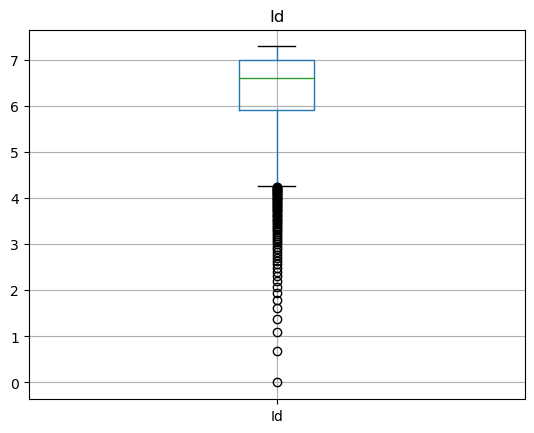

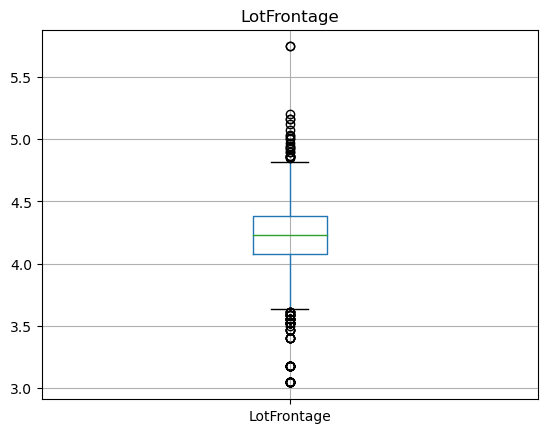

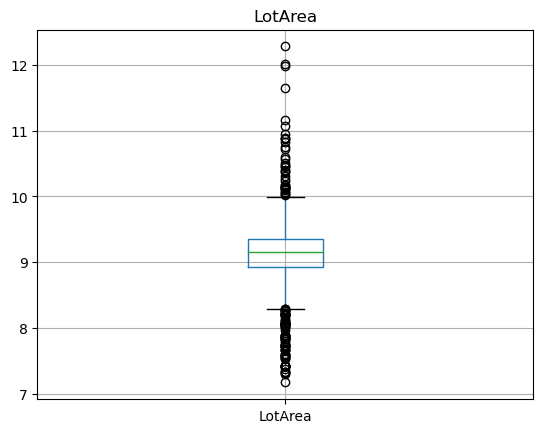

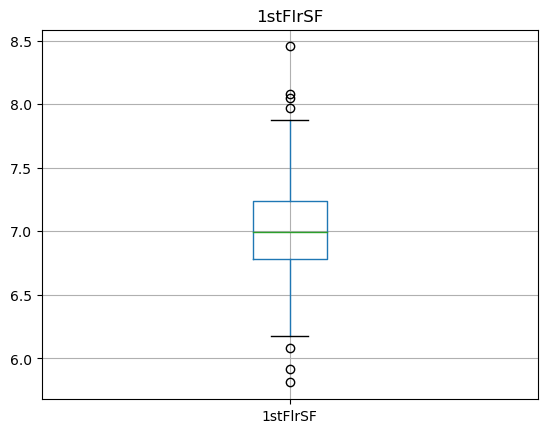

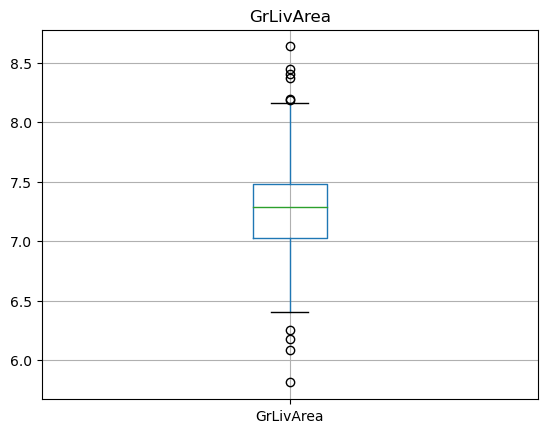

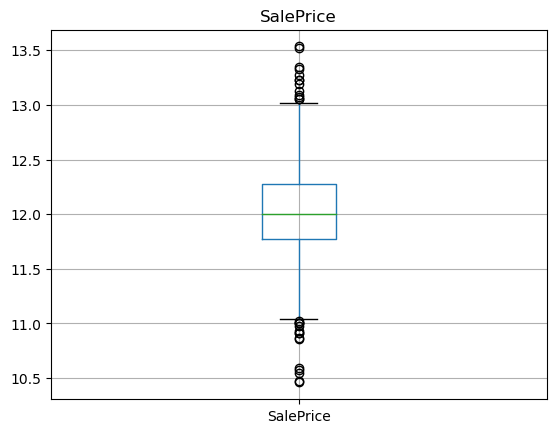

In [102]:
data=train.copy()
for i in cont_cols:
    if 0  in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data.boxplot(column=i)
        plt.title(i)
        plt.show()

In [103]:
cat_cols=[i for i in train.columns if train[i].dtypes=='O']

In [104]:
train[cat_cols].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [105]:
train[cat_cols].shape

(1460, 43)

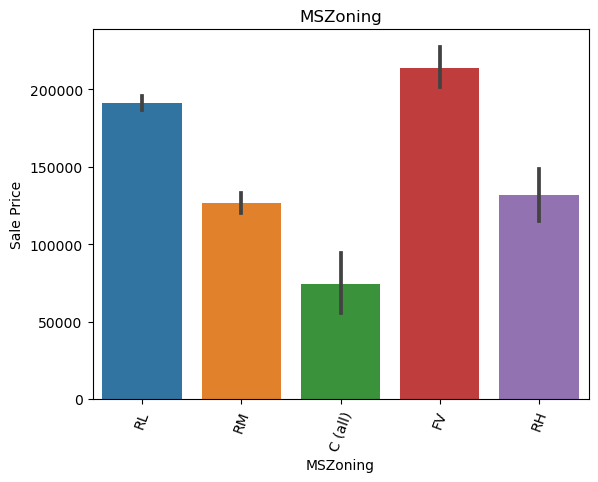

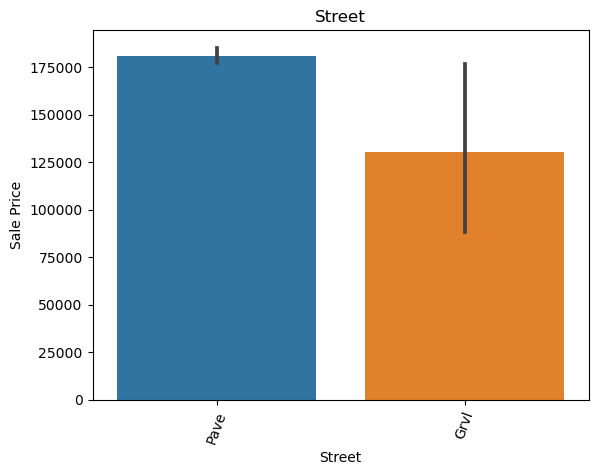

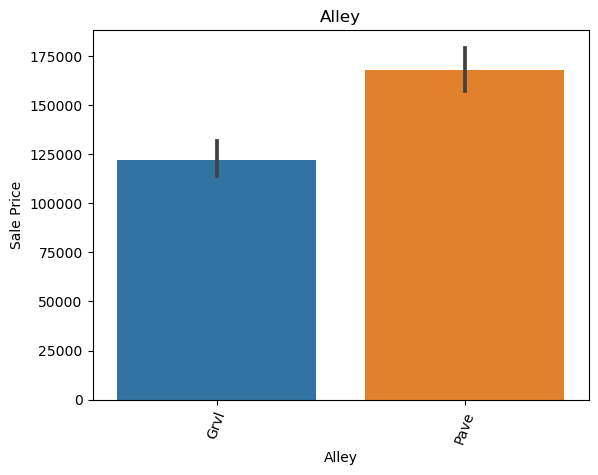

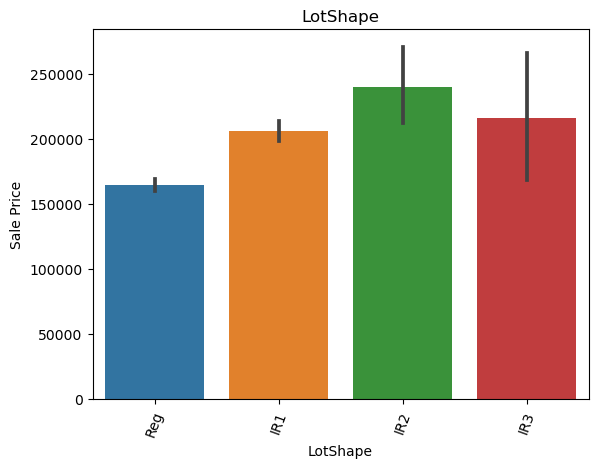

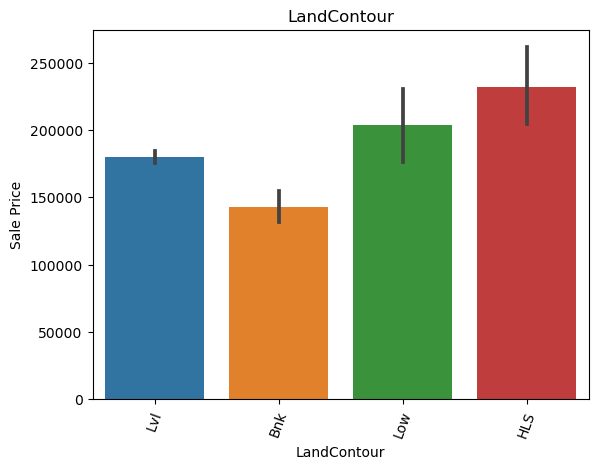

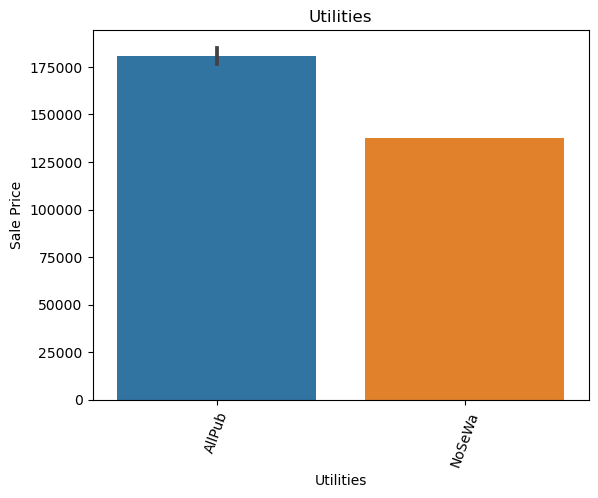

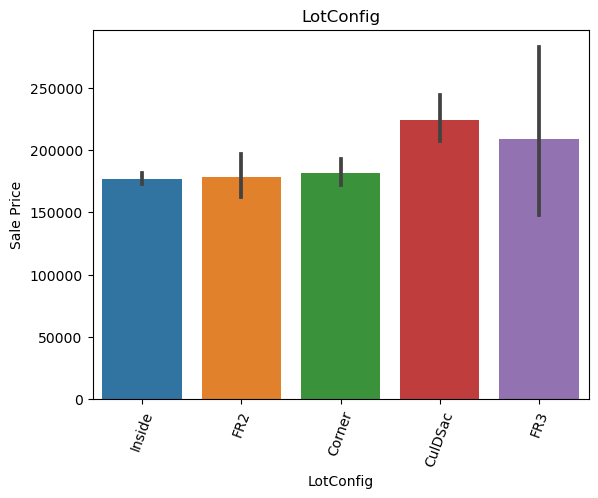

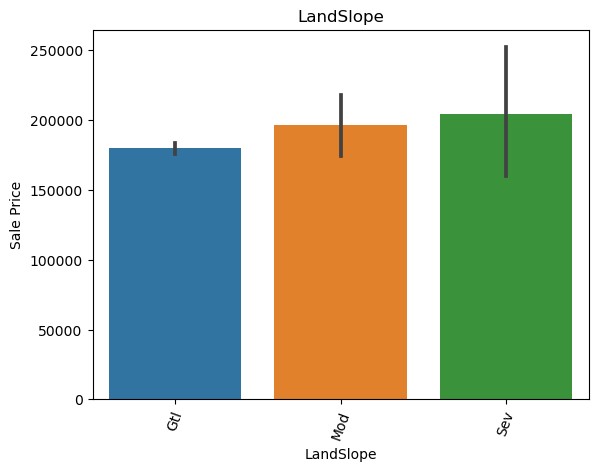

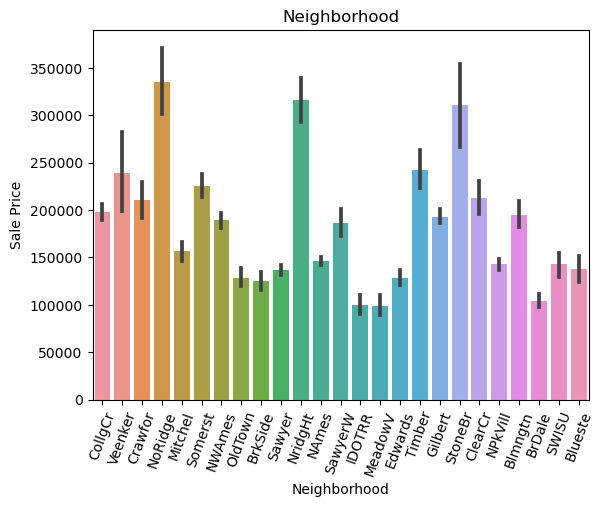

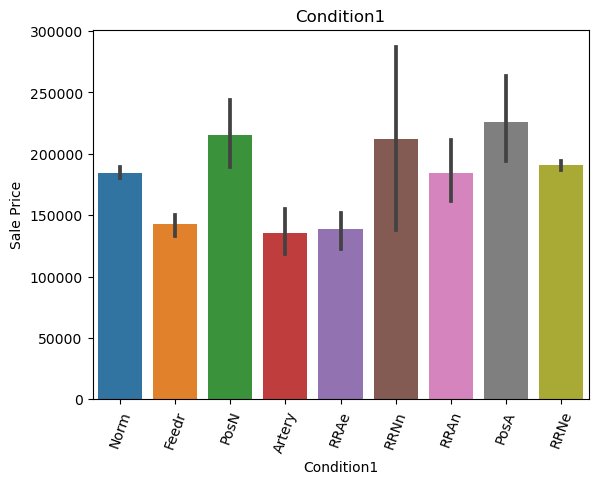

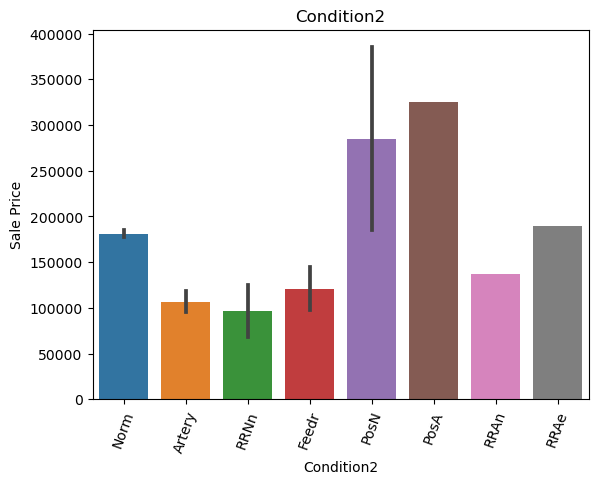

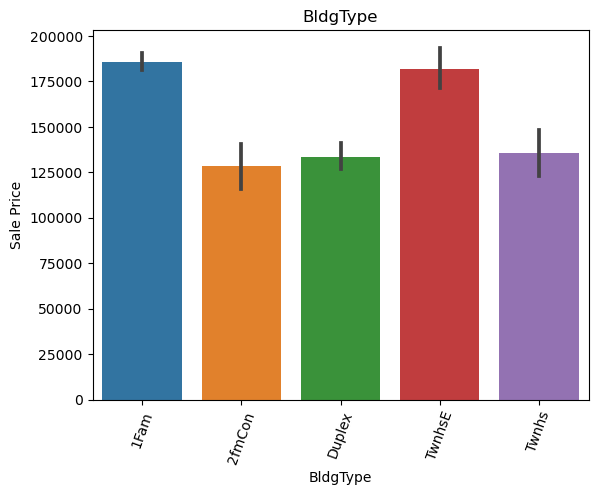

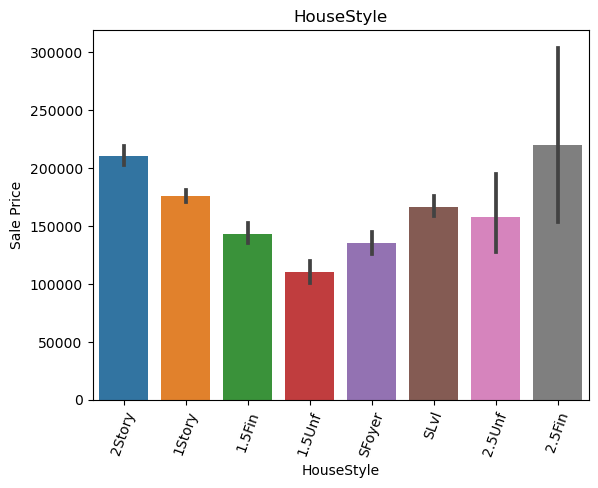

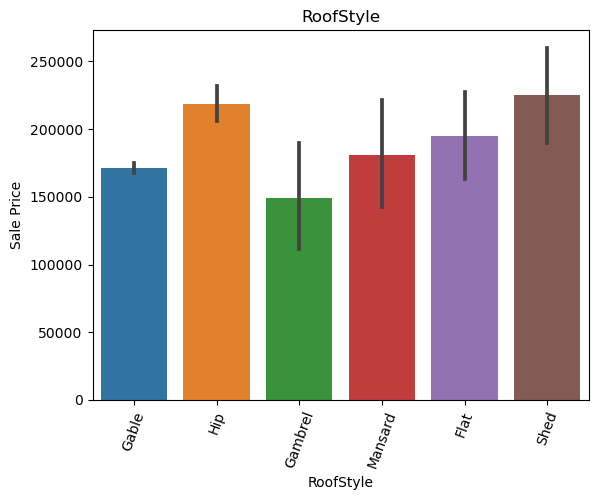

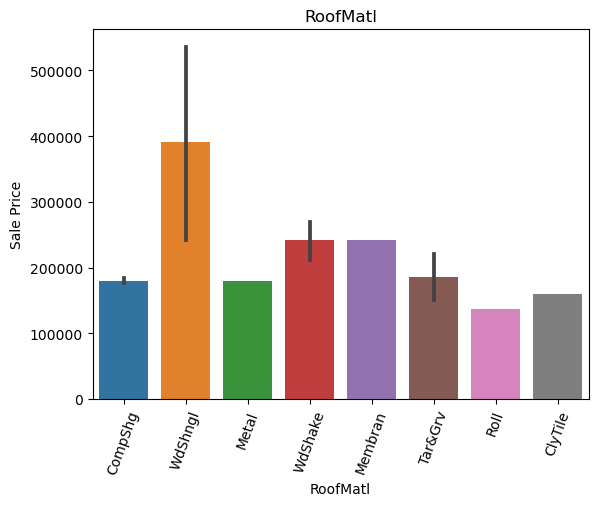

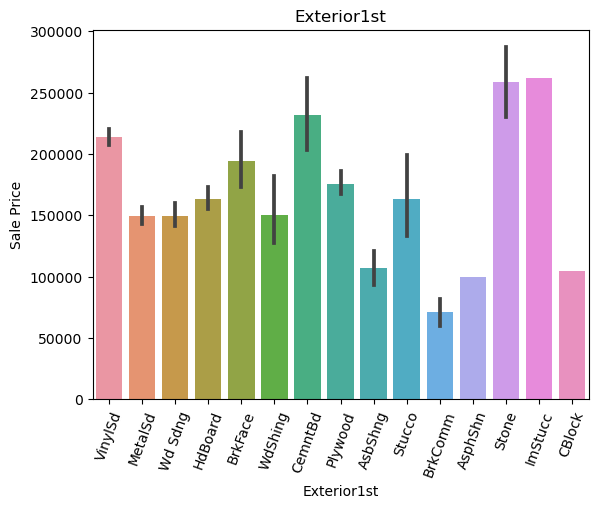

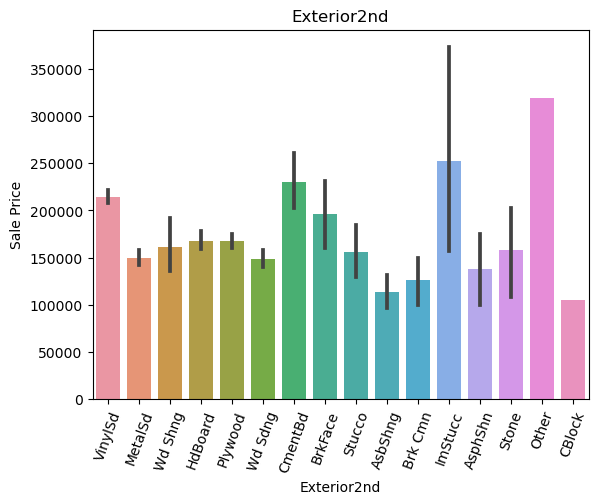

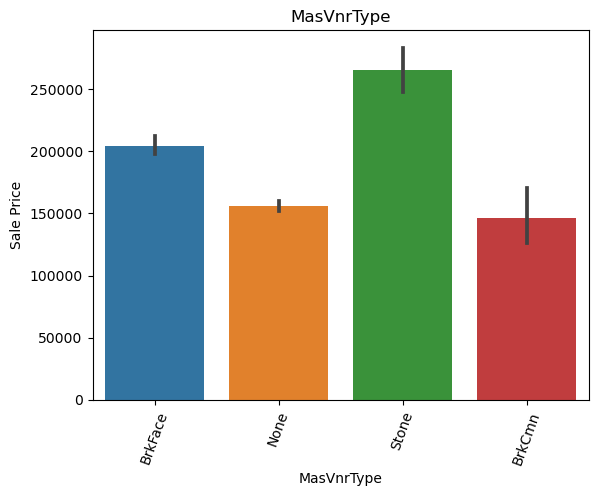

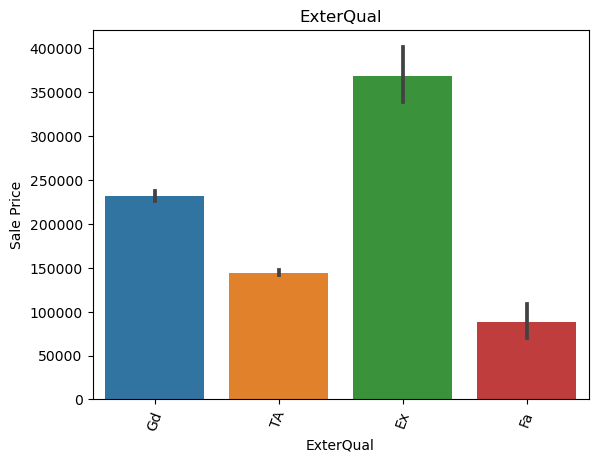

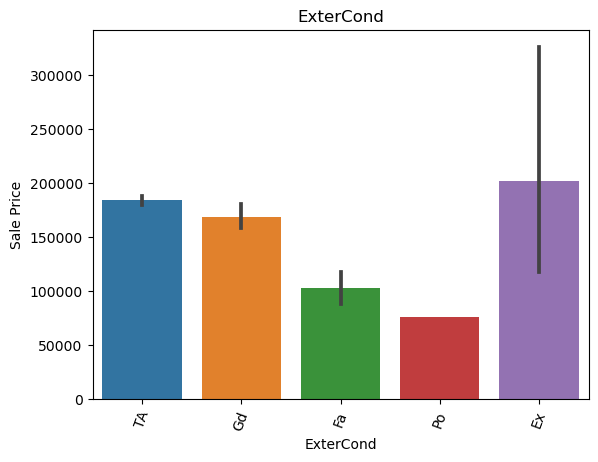

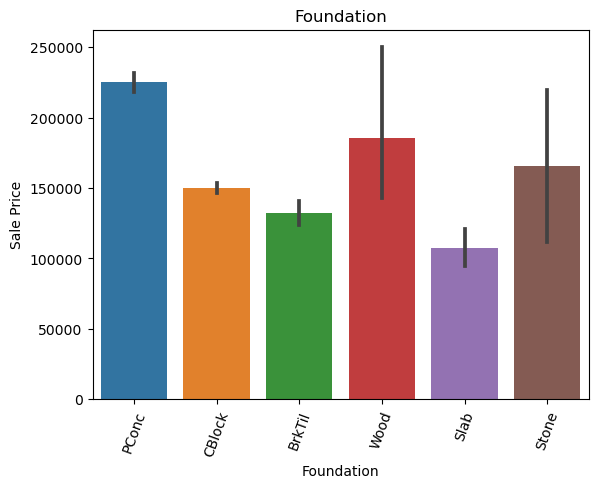

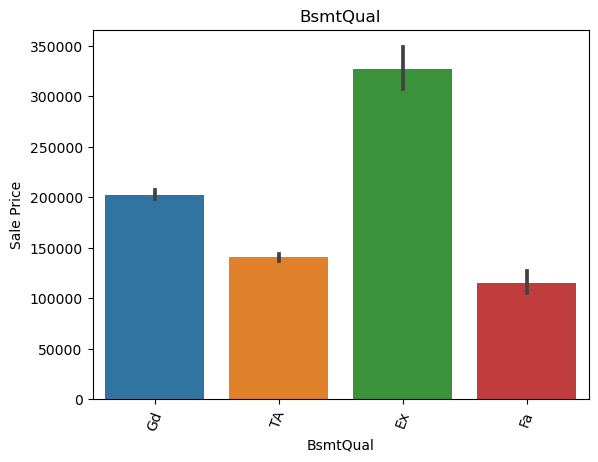

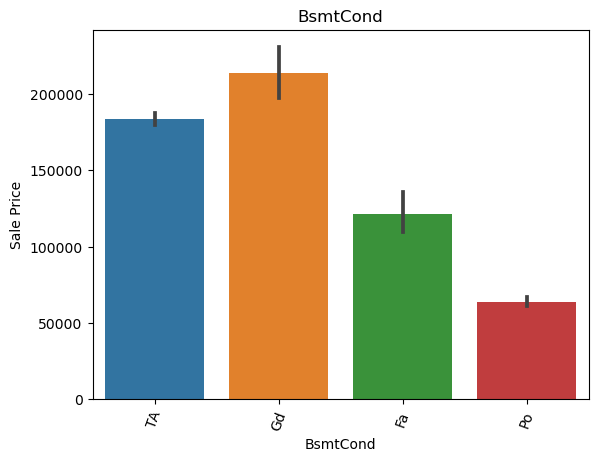

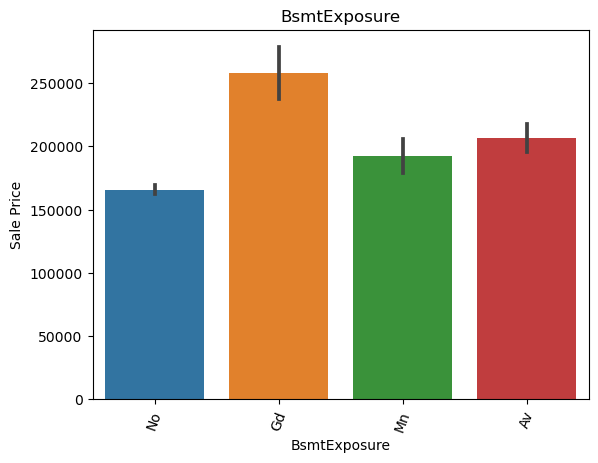

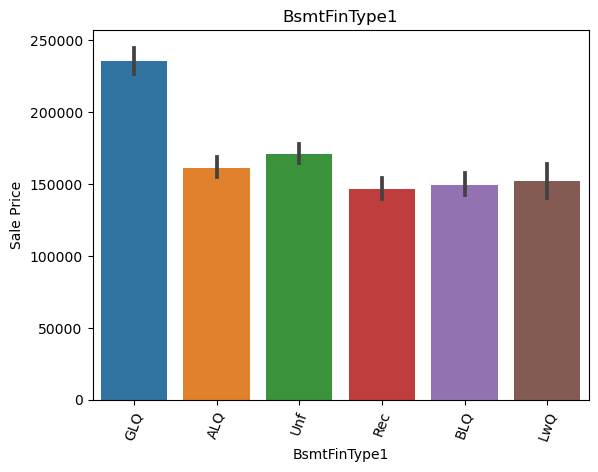

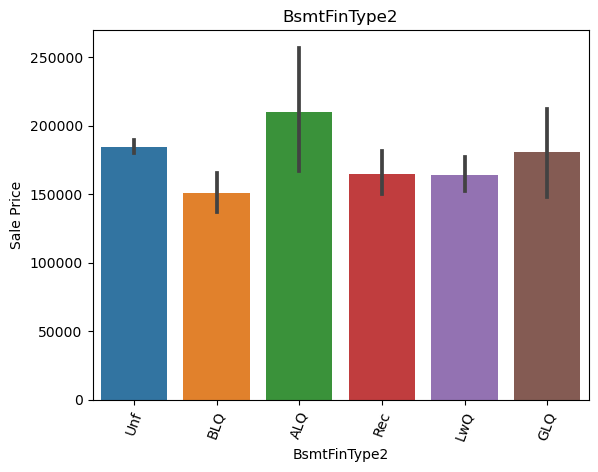

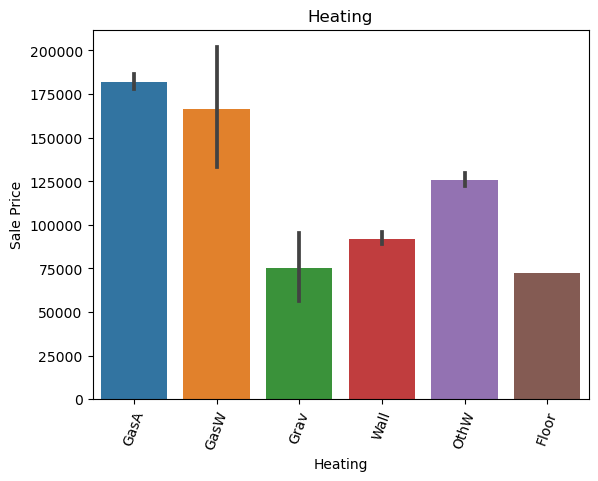

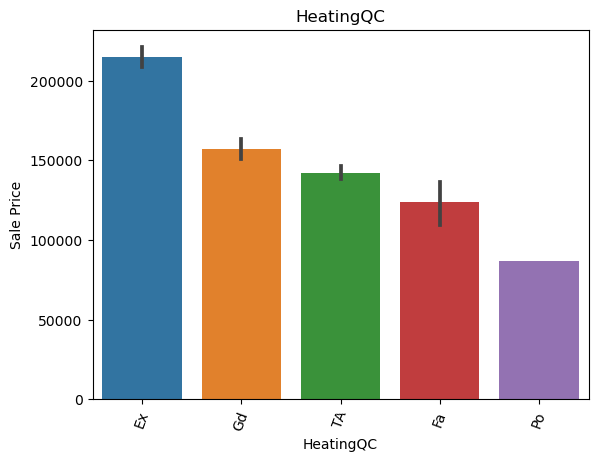

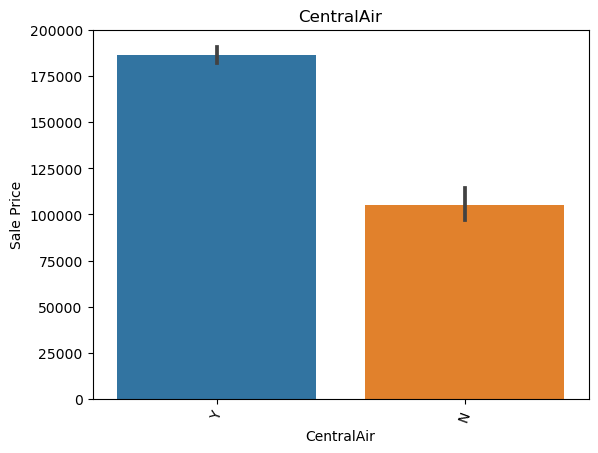

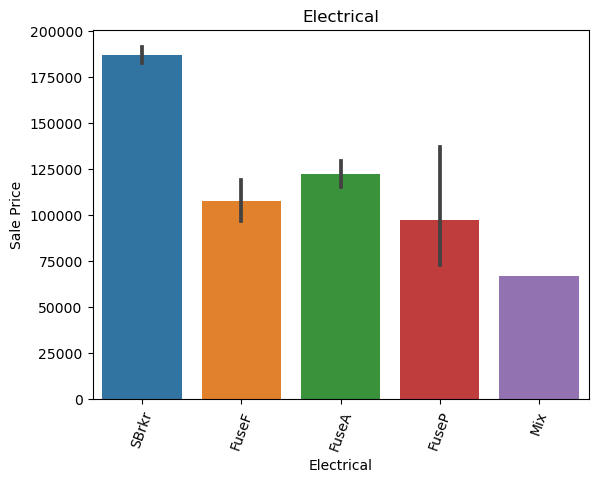

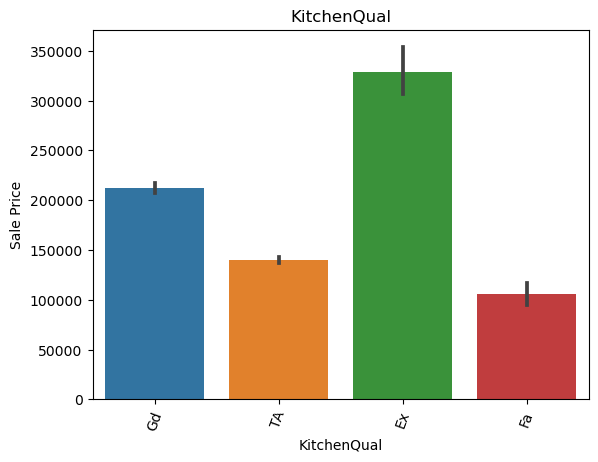

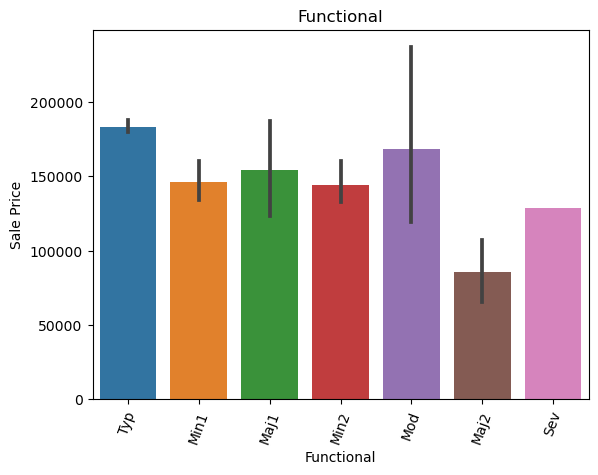

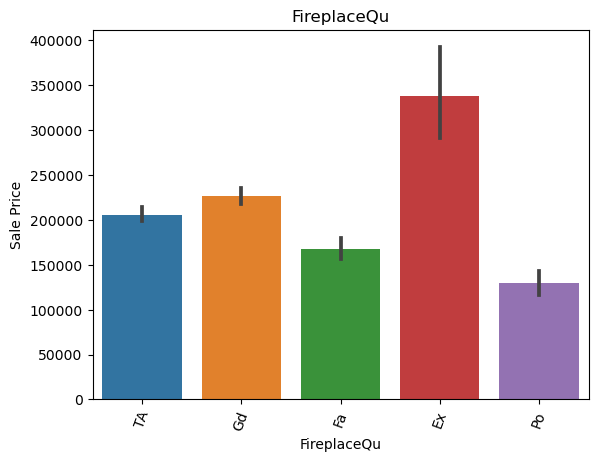

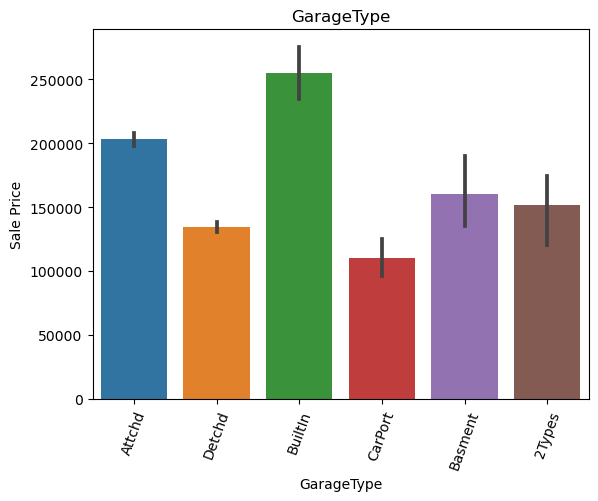

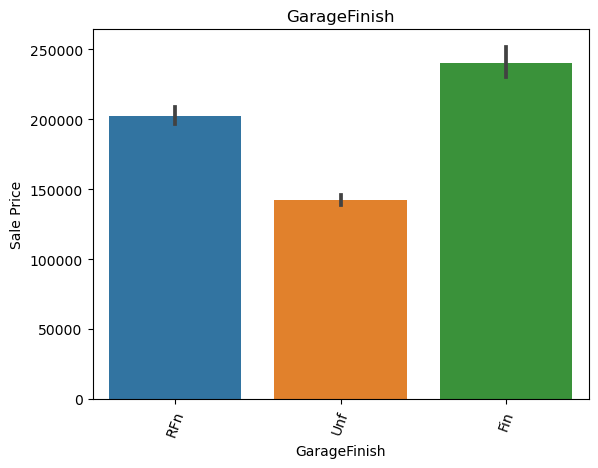

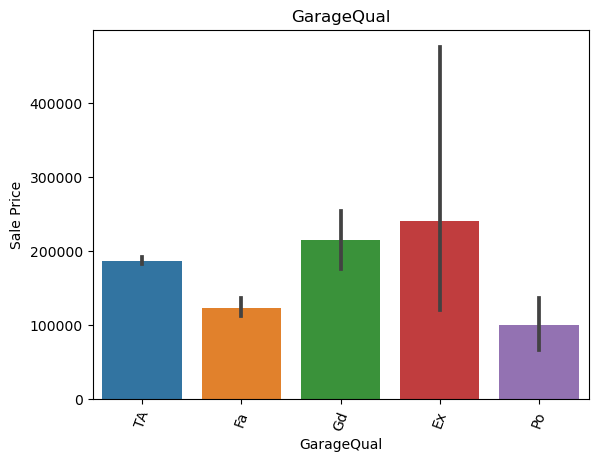

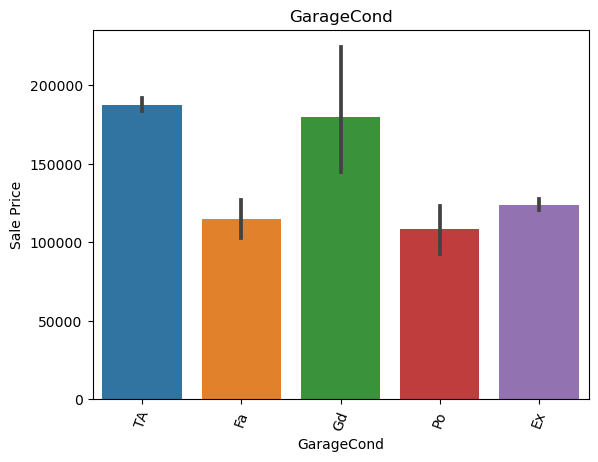

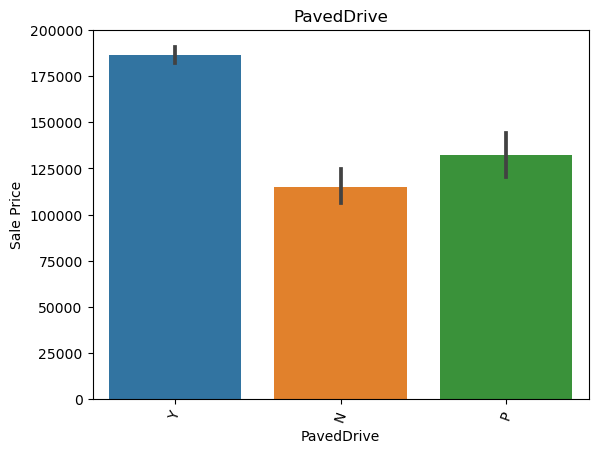

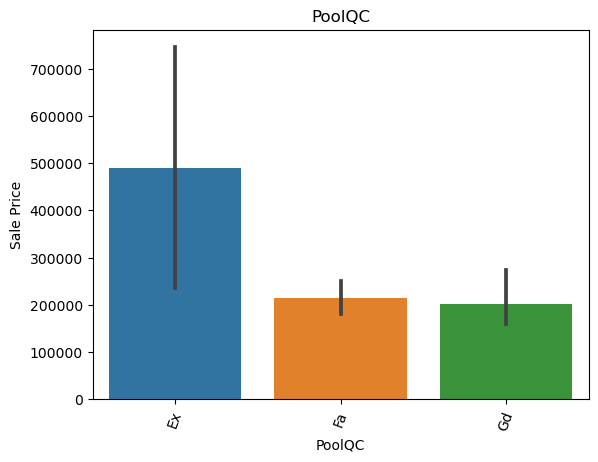

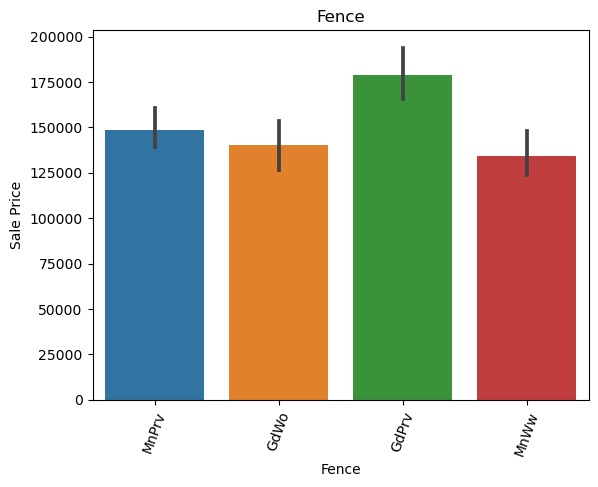

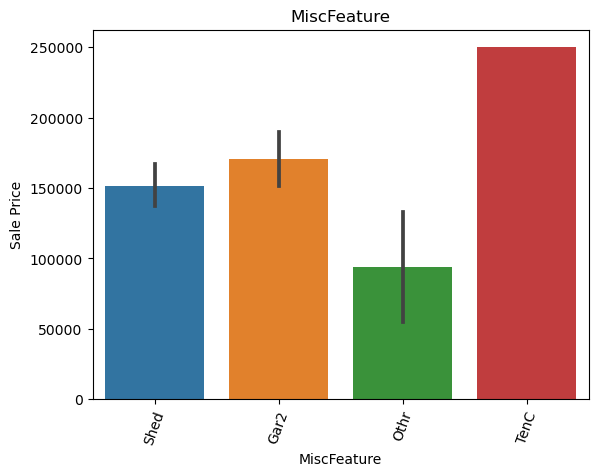

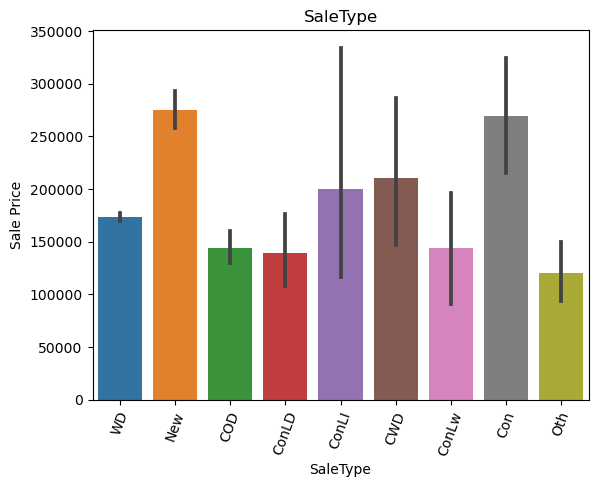

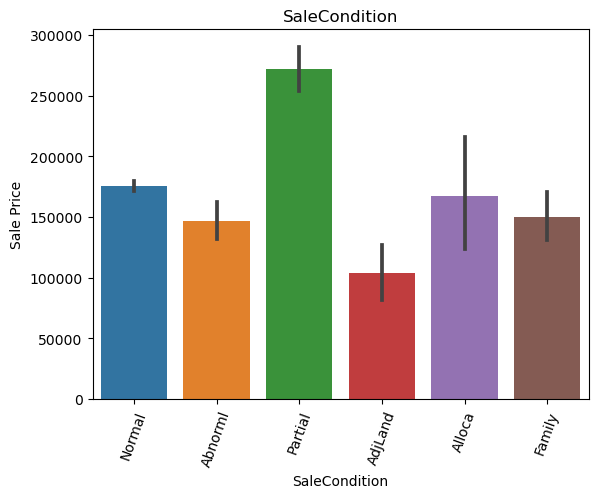

In [106]:
data=train.copy()
for i in cat_cols:
    sns.barplot(data=data,x=data[i],y=data['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('Sale Price')
    plt.title(i)
    plt.xticks(rotation=70)
    plt.show()
    

# Feature Engineering

## We will do below steps
- Handling missing values
- Temporal columns
- Categorical Columns and Remove rare values
- Standarize the values


In [107]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [108]:
from sklearn.model_selection import train_test_split
X=train.iloc[:,1:81]
y=train['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [109]:
print('Training Data is: {} * {}'.format(X_train.shape[0],X_train.shape[1]))
print('Training Data target is: {} '.format(y_train.shape[0]))
print('Validation Data is: {} * {}'.format(X_test.shape[0],X_test.shape[1]))
print('Training Data is: {}'.format(y_test.shape[0]))

Training Data is: 1314 * 80
Training Data target is: 1314 
Validation Data is: 146 * 80
Training Data is: 146


In [110]:
# missing values
for i in miss_col:
    print('The feature is {} and the missing values are {}%'.format(i,np.round(train[i].isnull().mean()*100,3)))

The feature is LotFrontage and the missing values are 17.74%
The feature is Alley and the missing values are 93.767%
The feature is MasVnrType and the missing values are 0.548%
The feature is MasVnrArea and the missing values are 0.548%
The feature is BsmtQual and the missing values are 2.534%
The feature is BsmtCond and the missing values are 2.534%
The feature is BsmtExposure and the missing values are 2.603%
The feature is BsmtFinType1 and the missing values are 2.534%
The feature is BsmtFinType2 and the missing values are 2.603%
The feature is Electrical and the missing values are 0.068%
The feature is FireplaceQu and the missing values are 47.26%
The feature is GarageType and the missing values are 5.548%
The feature is GarageYrBlt and the missing values are 5.548%
The feature is GarageFinish and the missing values are 5.548%
The feature is GarageQual and the missing values are 5.548%
The feature is GarageCond and the missing values are 5.548%
The feature is PoolQC and the missing

In [111]:
miss_df=np.round(train[miss_col].isnull().mean()*100,3).reset_index().rename(columns={'index':'features',0:'%missing values'})
miss_df

features  %missing values
0    LotFrontage           17.740
1          Alley           93.767
2     MasVnrType            0.548
3     MasVnrArea            0.548
4       BsmtQual            2.534
5       BsmtCond            2.534
6   BsmtExposure            2.603
7   BsmtFinType1            2.534
8   BsmtFinType2            2.603
9     Electrical            0.068
10   FireplaceQu           47.260
11    GarageType            5.548
12   GarageYrBlt            5.548
13  GarageFinish            5.548
14    GarageQual            5.548
15    GarageCond            5.548
16        PoolQC           99.521
17         Fence           80.753
18   MiscFeature           96.301

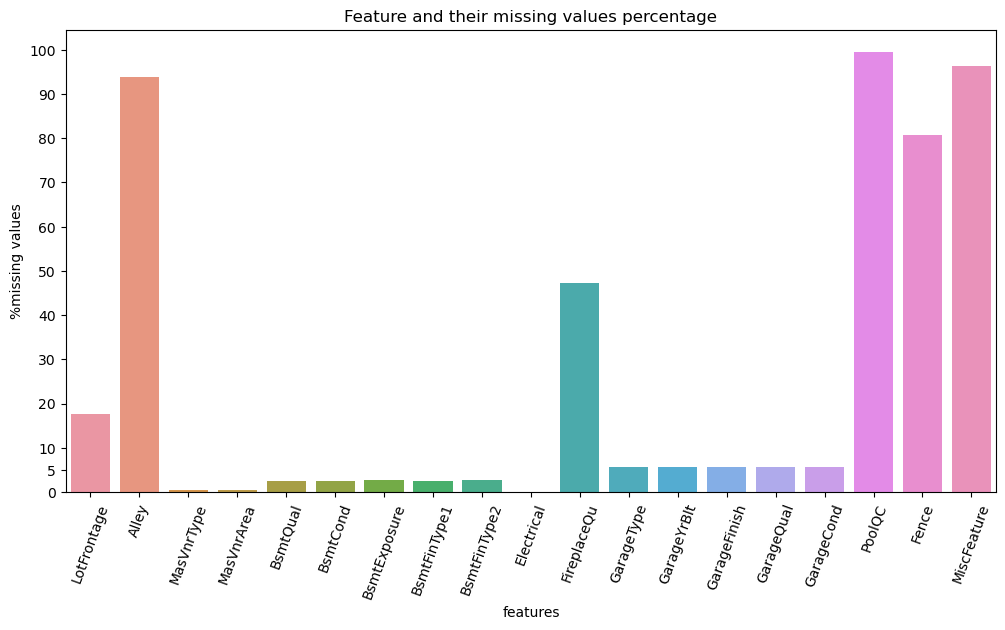

In [112]:
custom_ticks = [0,5, 10, 20, 30, 40,50,60,70,80,90,100]
plt.figure(figsize=(12,6))
sns.barplot(data=miss_df,x=miss_df['features'],y=miss_df['%missing values'],estimator='median')
plt.xticks(rotation=70)
plt.yticks(custom_ticks)
plt.title('Feature and their missing values percentage')
plt.show()

In [41]:
# 1 way of handling cat missing values with simple 'missing' category
data=train.copy()
def replace_missing(dataset,cat_cols):
    dataset[cat_cols]=dataset[cat_cols].fillna('missing')
    return dataset
replace_missing(data,cat_cols).head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  missing      Reg   
1   2          20       RL         80.0     9600   Pave  missing      Reg   
2   3          60       RL         68.0    11250   Pave  missing      IR1   
3   4          70       RL         60.0     9550   Pave  missing      IR1   
4   5          60       RL         84.0    14260   Pave  missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [113]:
# 2 way of handling cat missing values with mode
data=train.copy()
def replace_missing(dataset,cat_cols):
    dataset[cat_cols]=dataset[cat_cols].fillna(dataset[cat_cols].mode())
    return dataset
replace_missing(data,cat_cols).head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          Gd   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [114]:
# handling
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [115]:
train['LotFrontage'].fillna(train['LotFrontage'].median(),inplace=True)

In [116]:
train['Alley'].fillna(train['Alley'].mode(),inplace=True)

In [117]:
train.drop(['Id'],axis=1,inplace=True)

In [118]:
for i in train.columns:
    if train[i].dtypes!='O':
        train=pd.get_dummies(train,columns=[i],drop_first=True)
        

In [119]:
train.shape

(1460, 8046)

In [121]:
for i in train.columns:
    if train[i].dtypes=='O':
        train.drop(i,axis=1,inplace=True)

In [122]:
train.head(2)

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   

   LotFrontage_24.0  LotFrontage_30.0  LotFrontage_32.0  LotFrontage_33.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_34.0  LotFrontage_35.0  LotFrontage_36.0  LotFrontage_37.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_38.0  LotFrontage_39.0  LotFrontage_40.0  LotFrontage_41.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_42.0  LotFrontage_43.0  LotFrontage_44.0  LotFrontage_45.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_46.0  LotFrontage_47.0  LotFrontage_48.0  LotFrontage_49.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_50.0  LotFrontage_51.0  LotFrontage_52.0  LotFrontage_53.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_54.0  LotFrontage_55.0  LotFrontage_56.0  LotFrontage_57.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_58.0  LotFrontage_59.0  LotFrontage_60.0  LotFrontage_61.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_62.0  LotFrontage_63.0  LotFrontage_64.0  LotFrontage_65.0  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 0   

   LotFrontage_66.0  LotFrontage_67.0  LotFrontage_68.0  LotFrontage_69.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_70.0  LotFrontage_71.0  LotFrontage_72.0  LotFrontage_73.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_74.0  LotFrontage_75.0  LotFrontage_76.0  LotFrontage_77.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_78.0  LotFrontage_79.0  LotFrontage_80.0  LotFrontage_81.0  \
0                 0                 0                 0                 0   
1                 0                 0                 1                 0   

   LotFrontage_82.0  LotFrontage_83.0  LotFrontage_84.0  LotFrontage_85.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   LotFrontage_86.0  LotFrontage_87.0  LotFrontage_88.0  LotFront

In [123]:
ls

NameError: name 'L2' is not defined